Import Standard libraries

In [ ]:
import pandas as pd
import json
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Load dataset

In [ ]:
f= open('/content/dataset.txt','r')
line= f.readlines()

cpus=[]
mu=[]
j=0
for i in line:
  # print(j,sep=' ',end='.')
  j+=1
  string= json.loads(i)
  cpus.append(string['resource_request']['cpus'])
  mu.append(string['resource_request']['memory'])

In [ ]:
#Placeholder cell for data 

In [ ]:
pd.read_json(json.dumps(df)).to_csv('df.csv')

In [ ]:
df= pd.read_csv('/content/df.csv')
df.head()

,Unnamed: 0,time,type,collection_id,scheduling_class,missing_type,collection_type,priority,alloc_collection_id,instance_index,machine_id,alloc_instance_index,resource_request,constraint
0,0,155532006119,8,128142282100,2,1.0,0,103,0,14,4.451038e+09,-1,"{'cpus': 0.05987548828125, 'memory': 0.0169372...",[{'name': 'JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bY...
1,1,237703260896,8,128142282100,2,1.0,0,103,0,14,4.646002e+09,-1,"{'cpus': 0.05987548828125, 'memory': 0.0169372...",[{'name': 'JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bY...
2,2,242300422995,8,128142282100,2,1.0,0,103,0,14,2.085840e+07,-1,"{'cpus': 0.05987548828125, 'memory': 0.0169372...",[{'name': 'JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bY...
3,3,243040361522,8,128142282100,2,1.0,0,103,0,14,3.345884e+11,-1,"{'cpus': 0.05987548828125, 'memory': 0.0169372...",[{'name': 'JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bY...
4,4,244098330797,8,128142282100,2,1.0,0,103,0,14,2.386610e+10,-1,"{'cpus': 0.05987548828125, 'memory': 0.0169372...",[{'name': 'JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bY...


Pre-processing

In [ ]:
cpus=pd.Series(cpus)
cpus.head()

0    0.059875
1    0.059875
2    0.059875
3    0.059875
4    0.059875
dtype: float64

In [ ]:
mu=pd.Series(mu)
mu.head()

0    0.016937
1    0.016937
2    0.016937
3    0.016937
4    0.016937
dtype: float64

In [ ]:
df['cpus']=cpus
df['mu']=mu
df.head()

,Unnamed: 0,time,type,collection_id,scheduling_class,missing_type,collection_type,priority,alloc_collection_id,instance_index,machine_id,alloc_instance_index,resource_request,constraint,cpus,mu
0,0,155532006119,8,128142282100,2,1.0,0,103,0,14,4.451038e+09,-1,"{'cpus': 0.05987548828125, 'memory': 0.0169372...",[{'name': 'JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bY...,0.059875,0.016937
1,1,237703260896,8,128142282100,2,1.0,0,103,0,14,4.646002e+09,-1,"{'cpus': 0.05987548828125, 'memory': 0.0169372...",[{'name': 'JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bY...,0.059875,0.016937
2,2,242300422995,8,128142282100,2,1.0,0,103,0,14,2.085840e+07,-1,"{'cpus': 0.05987548828125, 'memory': 0.0169372...",[{'name': 'JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bY...,0.059875,0.016937
3,3,243040361522,8,128142282100,2,1.0,0,103,0,14,3.345884e+11,-1,"{'cpus': 0.05987548828125, 'memory': 0.0169372...",[{'name': 'JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bY...,0.059875,0.016937
4,4,244098330797,8,128142282100,2,1.0,0,103,0,14,2.386610e+10,-1,"{'cpus': 0.05987548828125, 'memory': 0.0169372...",[{'name': 'JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bY...,0.059875,0.016937


In [ ]:
df.columns

Index(['Unnamed: 0', 'time', 'type', 'collection_id', 'scheduling_class',
       'missing_type', 'collection_type', 'priority', 'alloc_collection_id',
       'instance_index', 'machine_id', 'alloc_instance_index',
       'resource_request', 'constraint', 'cpus', 'mu'],
      dtype='object')

In [ ]:
df=df.drop(['Unnamed: 0','resource_request','constraint'], axis=1)
df.head()

,time,type,collection_id,scheduling_class,missing_type,collection_type,priority,alloc_collection_id,instance_index,machine_id,alloc_instance_index,cpus,mu
0,155532006119,8,128142282100,2,1.0,0,103,0,14,4.451038e+09,-1,0.059875,0.016937
1,237703260896,8,128142282100,2,1.0,0,103,0,14,4.646002e+09,-1,0.059875,0.016937
2,242300422995,8,128142282100,2,1.0,0,103,0,14,2.085840e+07,-1,0.059875,0.016937
3,243040361522,8,128142282100,2,1.0,0,103,0,14,3.345884e+11,-1,0.059875,0.016937
4,244098330797,8,128142282100,2,1.0,0,103,0,14,2.386610e+10,-1,0.059875,0.016937


In [ ]:
df=df.drop('machine_id',axis=1)

In [ ]:
df=df.drop('alloc_instance_index',axis=1)

In [ ]:
norm=['time','collection_id','instance_index']
for i in norm:
  df[i]= (df[i]-np.min(df[i])) / (np.max(df[i])- np.min(df[i]))

In [ ]:
df['missing_type']=df['missing_type'].fillna(0)

In [ ]:
cat=['type', 'scheduling_class',
       'missing_type', 'collection_type', 'priority']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# cat=['RELY', 'DATA', 'CPLX', 'TIME', 'STOR', 'VIRT', 'TURN', 'ACAP', 'AEXP',
#        'PCAP', 'VEXP', 'LEXP', 'MODP', 'TOOL', 'SCED']

for i in cat:
  print(i)
  le.fit(df[i])
  df[i]= le.transform(df[i])

In [ ]:
df.head(15)

,time,type,collection_id,scheduling_class,missing_type,collection_type,priority,alloc_collection_id,instance_index,cpus,mu
0,0.058077,2,0.009174,2,1,0,1,0,0.01165,0.059875,0.016937
1,0.088760,2,0.009174,2,1,0,1,0,0.01165,0.059875,0.016937
2,0.090477,2,0.009174,2,1,0,1,0,0.01165,0.059875,0.016937
3,0.090753,2,0.009174,2,1,0,1,0,0.01165,0.059875,0.016937
4,0.091148,2,0.009174,2,1,0,1,0,0.01165,0.059875,0.016937
5,0.091960,2,0.009174,2,1,0,1,0,0.01165,0.059875,0.016937
6,0.092460,2,0.009174,2,1,0,1,0,0.01165,0.059875,0.016937
7,0.092863,2,0.009174,2,1,0,1,0,0.01165,0.059875,0.016937
8,0.093091,2,0.009174,2,1,0,1,0,0.01165,0.059875,0.016937
9,0.093197,2,0.009174,2,1,0,1,0,0.01165,0.059875,0.016937


In [ ]:
# df.to_csv('gcluster2019.csv')

Define target values and divide in train and test set

In [ ]:
X=df.drop(['cpus','mu'],axis=1)
y1=df['cpus']
y2=df['mu']

In [ ]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y1, test_size=0.35,random_state=42) #CPU Usage
X_train2,X_test2,y_train2,y_test2 = train_test_split(X,y2, test_size=0.35,random_state=42) #Memory Usage

In [123]:
mod=['KNN3','KNN5','KNN7','DT',"BR",'RF',"SVM","Ensemble"]

tr_sc1=[]
tr_er1=[] 
te_sc1=[]
te_er1=[]

tr_sc2=[] 
tr_er2=[]
te_sc2=[]
te_er2=[]

In [124]:
import math
from sklearn.metrics import mean_squared_error

K-Nearest Neighbors

In [125]:
#KNN3
from sklearn.neighbors import KNeighborsRegressor
knn3 = KNeighborsRegressor(n_neighbors=3)

#CPU
knn3.fit(X_train1,y_train1)
y_pred_tr=knn3.predict(X_train1)
y_pred_te=knn3.predict(X_test1)

print(y_pred_tr[:3])
print(y_pred_te[:3])
print()

tr_sc1.append(knn3.score(X_train1,y_pred_tr))
te_sc1.append(knn3.score(X_test1,y_pred_te))

tr_er1.append(math.sqrt(mean_squared_error(y_train1,y_pred_tr)))
te_er1.append(math.sqrt(mean_squared_error(y_test1,y_pred_te)))

#Memory
knn3.fit(X_train2,y_train2)
y_pred_tr=knn3.predict(X_train2)
y_pred_te=knn3.predict(X_test2)

print(y_pred_tr[:3])
print(y_pred_te[:3])
print()

tr_sc2.append(knn3.score(X_train2,y_pred_tr))
te_sc2.append(knn3.score(X_test2,y_pred_te))

tr_er2.append(math.sqrt(mean_squared_error(y_train2,y_pred_tr)))
te_er2.append(math.sqrt(mean_squared_error(y_test2,y_pred_te)))


[0.00405121 0.05987549 0.00405121]
[0.05987549 0.05987549 0.00405121]

[0.00572968 0.01693726 0.00572968]
[0.01693726 0.01693726 0.00572968]



In [126]:
#KNN5
from sklearn.neighbors import KNeighborsRegressor
knn5 = KNeighborsRegressor(n_neighbors=5)

#CPU
knn5.fit(X_train1,y_train1)
y_pred_tr=knn5.predict(X_train1)
y_pred_te=knn5.predict(X_test1)

print(y_pred_tr[:3])
print(y_pred_te[:3])
print()

tr_sc1.append(knn5.score(X_train1,y_pred_tr))
te_sc1.append(knn5.score(X_test1,y_pred_te))

tr_er1.append(math.sqrt(mean_squared_error(y_train1,y_pred_tr)))
te_er1.append(math.sqrt(mean_squared_error(y_test1,y_pred_te)))

#Memory
knn5.fit(X_train2,y_train2)
y_pred_tr=knn5.predict(X_train2)
y_pred_te=knn5.predict(X_test2)

print(y_pred_tr[:3])
print(y_pred_te[:3])
print()


tr_sc2.append(knn5.score(X_train2,y_pred_tr))
te_sc2.append(knn5.score(X_test2,y_pred_te))

tr_er2.append(math.sqrt(mean_squared_error(y_train2,y_pred_tr)))
te_er2.append(math.sqrt(mean_squared_error(y_test2,y_pred_te)))


[0.00405121 0.05987549 0.00405121]
[0.05987549 0.05987549 0.00405121]

[0.00572968 0.01693726 0.00572968]
[0.01693726 0.01693726 0.00572968]



In [127]:
#KNN7
from sklearn.neighbors import KNeighborsRegressor
knn7 = KNeighborsRegressor(n_neighbors=7)

#CPU
knn7.fit(X_train1,y_train1)
y_pred_tr=knn7.predict(X_train1)
y_pred_te=knn7.predict(X_test1)

print(y_pred_tr[:3])
print(y_pred_te[:3])
print()


tr_sc1.append(knn7.score(X_train1,y_pred_tr))
te_sc1.append(knn7.score(X_test1,y_pred_te))

tr_er1.append(math.sqrt(mean_squared_error(y_train1,y_pred_tr)))
te_er1.append(math.sqrt(mean_squared_error(y_test1,y_pred_te)))

#Memory
knn7.fit(X_train2,y_train2)
y_pred_tr=knn7.predict(X_train2)
y_pred_te=knn7.predict(X_test2)

print(y_pred_tr[:3])
print(y_pred_te[:3])
print()


tr_sc2.append(knn7.score(X_train2,y_pred_tr))
te_sc2.append(knn7.score(X_test2,y_pred_te))

tr_er2.append(math.sqrt(mean_squared_error(y_train2,y_pred_tr)))
te_er2.append(math.sqrt(mean_squared_error(y_test2,y_pred_te)))


[0.00405121 0.05987549 0.00405121]
[0.05987549 0.05987549 0.00405121]

[0.00572968 0.01693726 0.00572968]
[0.01693726 0.01693726 0.00572968]



Decision Tree

In [128]:
#Decision Tree
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()


#CPU
dt.fit(X_train1,y_train1)
y_pred_tr=dt.predict(X_train1)
y_pred_te=dt.predict(X_test1)

print(y_pred_tr[:3])
print(y_pred_te[:3])
print()

tr_sc1.append(dt.score(X_train1,y_pred_tr))
te_sc1.append(dt.score(X_test1,y_pred_te))

tr_er1.append(math.sqrt(mean_squared_error(y_train1,y_pred_tr)))
te_er1.append(math.sqrt(mean_squared_error(y_test1,y_pred_te)))

#Memory
dt.fit(X_train2,y_train2)
y_pred_tr=dt.predict(X_train2)
y_pred_te=dt.predict(X_test2)

print(y_pred_tr[:3])
print(y_pred_te[:3])
print()

tr_sc2.append(dt.score(X_train2,y_pred_tr))
te_sc2.append(dt.score(X_test2,y_pred_te))

tr_er2.append(math.sqrt(mean_squared_error(y_train2,y_pred_tr)))
te_er2.append(math.sqrt(mean_squared_error(y_test2,y_pred_te)))

[0.00405121 0.05987549 0.00405121]
[0.05987549 0.05987549 0.00405121]

[0.00573758 0.01693726 0.00573758]
[0.01693726 0.01693726 0.00573758]



Bayesian Ridge

In [129]:
from sklearn.linear_model import BayesianRidge
gnb = BayesianRidge()
# gnb = GaussianNB()

#CPU
gnb.fit(X_train1,y_train1)
y_pred_tr=gnb.predict(X_train1)
y_pred_te=gnb.predict(X_test1)

print(y_pred_tr[:3])
print(y_pred_te[:3])
print()

tr_sc1.append(gnb.score(X_train1,y_pred_tr))
te_sc1.append(gnb.score(X_test1,y_pred_te))

tr_er1.append(math.sqrt(mean_squared_error(y_train1,y_pred_tr)))
te_er1.append(math.sqrt(mean_squared_error(y_test1,y_pred_te)))

#Memory
gnb.fit(X_train2,y_train2)
y_pred_tr=gnb.predict(X_train2)
y_pred_te=gnb.predict(X_test2)

print(y_pred_tr[:3])
print(y_pred_te[:3])
print()

tr_sc2.append(gnb.score(X_train2,y_pred_tr))
te_sc2.append(gnb.score(X_test2,y_pred_te))

tr_er2.append(math.sqrt(mean_squared_error(y_train2,y_pred_tr)))
te_er2.append(math.sqrt(mean_squared_error(y_test2,y_pred_te)))

[0.00435777 0.05973652 0.00396975]
[0.05974498 0.05977836 0.00394043]

[0.00591067 0.01691752 0.00568694]
[0.01686511 0.01690407 0.0055994 ]



Random Forest

In [130]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

#CPU
rf.fit(X_train1,y_train1)
y_pred_tr=rf.predict(X_train1)
y_pred_te=rf.predict(X_test1)

print(y_pred_tr[:3])
print(y_pred_te[:3])
print()

tr_sc1.append(rf.score(X_train1,y_pred_tr))
te_sc1.append(rf.score(X_test1,y_pred_te))

tr_er1.append(math.sqrt(mean_squared_error(y_train1,y_pred_tr)))
te_er1.append(math.sqrt(mean_squared_error(y_test1,y_pred_te)))

#Memory
rf.fit(X_train2,y_train2)
y_pred_tr=rf.predict(X_train2)
y_pred_te=rf.predict(X_test2)

print(y_pred_tr[:3])
print(y_pred_te[:3])
print()

tr_sc2.append(rf.score(X_train2,y_pred_tr))
te_sc2.append(rf.score(X_test2,y_pred_te))

tr_er2.append(math.sqrt(mean_squared_error(y_train2,y_pred_tr)))
te_er2.append(math.sqrt(mean_squared_error(y_test2,y_pred_te)))

[0.00405121 0.05987549 0.00405121]
[0.05987549 0.05987549 0.00405121]

[0.00573686 0.01693698 0.00573686]
[0.01693698 0.01693698 0.00573686]



Support Vector Machine

In [131]:
#SVM
from sklearn import svm
sv = svm.SVR(epsilon=0.1)

#CPU
sv.fit(X_train1,y_train1)
y_pred_tr=sv.predict(X_train1)
y_pred_te=sv.predict(X_test1)

print(y_pred_tr[:3])
print(y_pred_te[:3])
print()


tr_sc1.append(sv.score(X_train1,y_pred_tr))
te_sc1.append(sv.score(X_test1,y_pred_te))

tr_er1.append(math.sqrt(mean_squared_error(y_train1,y_pred_tr)))
te_er1.append(math.sqrt(mean_squared_error(y_test1,y_pred_te)))

#Memory
sv.fit(X_train2,y_train2)
y_pred_tr=sv.predict(X_train2)
y_pred_te=sv.predict(X_test2)

print(y_pred_tr[:3])
print(y_pred_te[:3])
print()


tr_sc2.append(sv.score(X_train2,y_pred_tr))
te_sc2.append(sv.score(X_test2,y_pred_te))

tr_er2.append(math.sqrt(mean_squared_error(y_train2,y_pred_tr)))
te_er2.append(math.sqrt(mean_squared_error(y_test2,y_pred_te)))

[0.03196335 0.03196335 0.03196335]
[0.03196335 0.03196335 0.03196335]

[0.01245689 0.01245689 0.01245689]
[0.01245689 0.01245689 0.01245689]



Ensemble voting (mean)

In [132]:
from sklearn.ensemble import VotingRegressor
en = VotingRegressor([('KNN3', knn3), ('KNN5', knn5), ('KNN7',knn7), ('DT',dt), ('BR',gnb), ('RF', rf), ('SVR',sv)])

#CPU
en.fit(X_train1,y_train1)
y_pred_tr=en.predict(X_train1)
y_pred_te=en.predict(X_test1)

print(y_pred_tr[:3])
print(y_pred_te[:3])
print()


tr_sc1.append(en.score(X_train1,y_pred_tr))
te_sc1.append(en.score(X_test1,y_pred_te))

tr_er1.append(math.sqrt(mean_squared_error(y_train1,y_pred_tr)))
te_er1.append(math.sqrt(mean_squared_error(y_test1,y_pred_te)))

#Memory
en.fit(X_train2,y_train2)
y_pred_tr=en.predict(X_train2)
y_pred_te=en.predict(X_test2)

print(y_pred_tr[:3])
print(y_pred_te[:3])
print()


tr_sc2.append(en.score(X_train2,y_pred_tr))
te_sc2.append(en.score(X_test2,y_pred_te))

tr_er2.append(math.sqrt(mean_squared_error(y_train2,y_pred_tr)))
te_er2.append(math.sqrt(mean_squared_error(y_test2,y_pred_te)))

[0.00808245 0.05586819 0.00802702]
[0.0558694  0.05587416 0.00802283]

[0.00671833 0.01629437 0.00668637]
[0.01628688 0.01629245 0.00667387]



#Analysis

In [ ]:
mod=['KNearestNeighbors 3','KNearestNeighbors 5','KNearestNeighbors 7','Decision Tree',"Bayesian Ridge",'Random Forest',"Support Vector Machine","Ensemble"]

print(tr_sc1)
print(tr_er1)
print(te_sc1)
print(te_er1)

print(tr_sc2)
print(tr_er2)
print(te_sc2)
print(te_er2)

In [144]:
comp['Models'] = pd.DataFrame(mod) 
comp=comp.drop(0, axis=1)
comp['Train error (CPU usage)']= pd.Series(tr_er1)
comp['Test error (CPU usage)']= pd.Series(te_er1)
comp['Train error (Memory usage)']= pd.Series(tr_er2)
comp['Test error (Memory usage)']= pd.Series(te_er2)
comp

,Models,Train error (CPU usage),Test error (CPU usage),Train error (Memory usage),Test error (Memory usage)
0,KNearestNeighbors 3,0.000296,0.000295,0.000459,0.000429
1,KNearestNeighbors 5,0.000720,0.000601,0.000657,0.000475
2,KNearestNeighbors 7,0.001053,0.000932,0.000736,0.000496
3,Decision Tree,0.000009,0.000201,0.000060,0.000079
4,Bayesian Ridge,0.001187,0.001315,0.000684,0.000515
5,Random Forest,0.000398,0.000451,0.000195,0.000069
6,Support Vector Machine,0.027855,0.027894,0.006285,0.006219
7,Ensemble,0.004015,0.004038,0.001007,0.000935


In [145]:
# comp.to_csv("Compiled error table.csv")

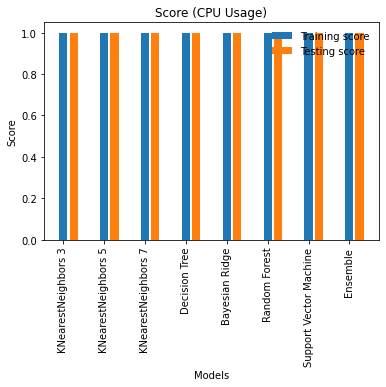

In [134]:
import matplotlib.pyplot as plt
import numpy as np
nodes= np.arange(len(mod))

plt.bar(nodes,tr_sc1,width=0.2, align='center' ,label='Training score')
plt.bar(nodes+0.25,te_sc1,width=0.2, align='center',label='Testing score')

plt.title("Score (CPU Usage)")
plt.xlabel("Models")
plt.ylabel("Score")
plt.xticks(nodes,mod,rotation=90)
plt.legend(loc='best', frameon=False)
plt.show()

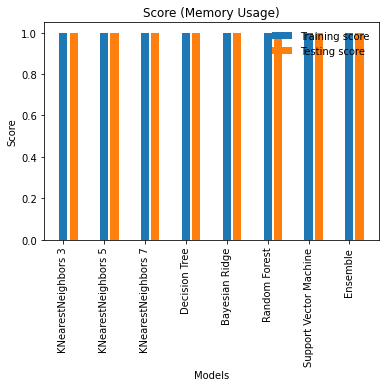

In [135]:
# import matplotlib.pyplot as plt
# import numpy as np
# nodes= np.arange(len(mod))

plt.bar(nodes,tr_sc2,width=0.2, align='center' ,label='Training score')
plt.bar(nodes+0.25,te_sc2,width=0.2, align='center',label='Testing score')

plt.title("Score (Memory Usage)")
plt.xlabel("Models")
plt.ylabel("Score")
plt.xticks(nodes,mod,rotation=90)
plt.legend(loc='best', frameon=False)
plt.show()

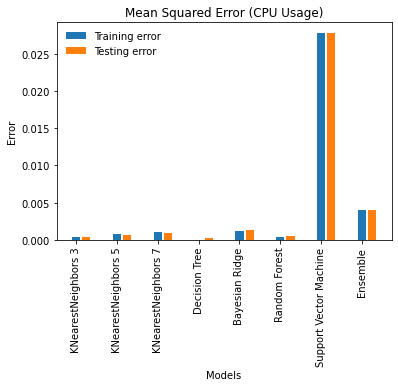

In [136]:
plt.bar(nodes,tr_er1,width=0.2, align='center' ,label='Training error')
plt.bar(nodes+0.25,te_er1,width=0.2, align='center',label='Testing error')

plt.title("Mean Squared Error (CPU Usage)")
plt.xlabel("Models")
plt.ylabel("Error")
plt.xticks(nodes,mod,rotation=90)
plt.legend(loc='best', frameon=False)
plt.show()

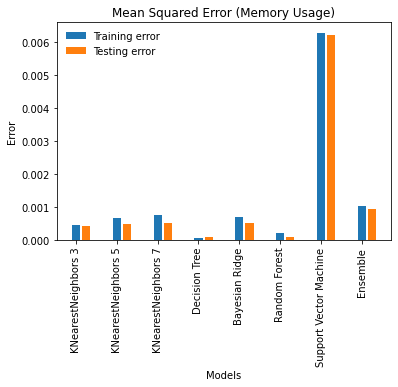

In [137]:
plt.bar(nodes,tr_er2,width=0.2, align='center' ,label='Training error')
plt.bar(nodes+0.25,te_er2,width=0.2, align='center',label='Testing error')

plt.title("Mean Squared Error (Memory Usage)")
plt.xlabel("Models")
plt.ylabel("Error")
plt.xticks(nodes,mod,rotation=90)
plt.legend(loc='best', frameon=False)
plt.show()

In [ ]:
# df=[{"time":"155532006119","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"14","machine_id":"4451038309","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"237703260896","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"14","machine_id":"4646001869","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"242300422995","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"14","machine_id":"20858399","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"243040361522","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"14","machine_id":"334588405431","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"244098330797","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"14","machine_id":"23866101000","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"246274544007","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"14","machine_id":"23859191809","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"247613522285","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"14","machine_id":"376652608362","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"248690702475","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"14","machine_id":"375997400431","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"249302319882","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"14","machine_id":"376470551808","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"249584992469","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"14","machine_id":"23859191809","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"291469256420","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"14","machine_id":"73747626988","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"298602782634","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"14","machine_id":"23744284560","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"298602782782","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"14","machine_id":"23744674484","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"299208354544","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"14","machine_id":"1187326085","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"300134136557","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"14","machine_id":"36050121157","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"301134935217","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"14","machine_id":"250621993986","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"301330893983","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"14","machine_id":"373220226718","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"301333196718","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"14","machine_id":"62156456","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"301491767088","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"14","machine_id":"327757431088","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"310154440547","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"14","machine_id":"21284378","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"310160427552","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"14","machine_id":"376470464706","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"865458886052","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"14","machine_id":"33154391584","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"914187791091","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"14","machine_id":"70533190467","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"914346044768","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"14","machine_id":"105123816784","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"917453046918","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"14","machine_id":"102983737616","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"918389182639","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"14","machine_id":"104792376663","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"924388273160","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"14","machine_id":"24321997633","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"925018443599","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"14","machine_id":"96914917363","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1004562982806","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"14","machine_id":"77438507659","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1065916427379","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"14","machine_id":"21375450","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1249055996992","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"14","machine_id":"372930993459","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1342375464911","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"14","machine_id":"72042144540","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1425774564001","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"14","machine_id":"71979033305","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1436314886746","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"14","machine_id":"104792289026","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1436327018742","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"14","machine_id":"74464363474","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1526226829210","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"14","machine_id":"20736969","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1538900211292","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"14","machine_id":"102983566293","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1540863212721","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"14","machine_id":"259473609968","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1617074605199","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"14","machine_id":"92002015206","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1617389981715","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"14","machine_id":"1421708186","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1696773813272","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"14","machine_id":"86192099803","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1765313859328","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"14","machine_id":"92056727844","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1768634174545","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"14","machine_id":"91991936277","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2033070420269","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"14","machine_id":"521017497","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2043380057289","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"14","machine_id":"20734328","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2133901799180","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"14","machine_id":"35892189014","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2137747553652","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"14","machine_id":"23749031020","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2212977355392","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"14","machine_id":"24173348413","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2213439377514","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"14","machine_id":"23749019462","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2294056067858","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"14","machine_id":"104807892665","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2367327625164","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"14","machine_id":"24271001690","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2376176904339","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"14","machine_id":"24273628608","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2465320614596","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"14","machine_id":"73750228145","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2465841302423","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"14","machine_id":"371141432763","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2539678327098","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"14","machine_id":"24273424209","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"0","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"14","machine_id":"20946831","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"0","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"14","machine_id":"24271004240","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"0","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"14","machine_id":"25536824701","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"0","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"14","machine_id":"348404692415","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"224812546689","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"393","machine_id":"102892828007","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"225130184368","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"393","machine_id":"102892828007","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"231433514936","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"393","machine_id":"68668153187","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"244086811888","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"393","machine_id":"96914917362","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"244665499251","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"393","machine_id":"24966877196","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"245784632903","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"393","machine_id":"19882913433","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"246553759749","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"393","machine_id":"104792798696","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"405789756882","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"393","machine_id":"375997349837","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"661553160852","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"393","machine_id":"4649807832","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"921100417166","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"393","machine_id":"376652646907","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"927969144673","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"393","machine_id":"25541879559","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"973237879209","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"393","machine_id":"23744284560","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"973719192449","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"393","machine_id":"4451412952","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1004133752520","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"393","machine_id":"35871577042","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1256304309170","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"393","machine_id":"2060303307","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1517090314191","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"393","machine_id":"105123839113","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1527442545847","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"393","machine_id":"20736947","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1549034048168","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"393","machine_id":"92054928587","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2041510187806","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"393","machine_id":"21381315","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2108232256214","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"393","machine_id":"4451020876","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2132088147119","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"393","machine_id":"104792005923","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2141434026849","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"393","machine_id":"358563695050","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2275903454747","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"393","machine_id":"70532640309","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2303588368891","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"393","machine_id":"23744627222","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2307083148763","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"393","machine_id":"33151706510","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2367800573605","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"393","machine_id":"68350980375","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2393223440520","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"393","machine_id":"104792148951","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2398227240926","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"393","machine_id":"373237228466","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2400522782733","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"393","machine_id":"382098636885","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2470843387213","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"393","machine_id":"104791921916","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2488842230095","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"393","machine_id":"102893546855","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2563503356567","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"393","machine_id":"259062244030","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"0","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"393","machine_id":"4451020892","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"0","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"393","machine_id":"4451052229","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"158082651138","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"71","machine_id":"23744677133","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"224865652526","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"71","machine_id":"376470395347","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"235687329039","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"71","machine_id":"23744674486","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"246185402192","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"71","machine_id":"375997284373","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"248766761988","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"71","machine_id":"375997374094","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"249102522081","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"71","machine_id":"376470516419","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"309815292941","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"71","machine_id":"105126723514","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"463795196239","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"71","machine_id":"21308831","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"653377328708","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"71","machine_id":"359824491529","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"660622348154","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"71","machine_id":"24273580829","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"663898557962","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"71","machine_id":"4649858446","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"918904617658","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"71","machine_id":"33687540165","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"922124757860","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"71","machine_id":"33686936000","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"924924305261","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"71","machine_id":"382083694151","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1003898841203","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"71","machine_id":"24271002680","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1007138714115","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"71","machine_id":"330553235806","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1101355014424","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"71","machine_id":"198157008657","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1180218763756","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"71","machine_id":"1375591476","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1256732645751","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"71","machine_id":"373578944035","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1261322654886","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"71","machine_id":"70530422882","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1274821316750","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"71","machine_id":"91961944719","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1354381645838","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"71","machine_id":"102893237718","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1354805320207","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"71","machine_id":"91961433083","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1356926333942","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"71","machine_id":"92139692575","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1447434971625","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"71","machine_id":"70518642686","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1535056850141","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"71","machine_id":"104791141005","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1614964067585","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"71","machine_id":"92054254796","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1616784530291","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"71","machine_id":"24272855520","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1625879146802","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"71","machine_id":"102983332929","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1706480653541","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"71","machine_id":"1639302788","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1869473421545","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"71","machine_id":"92152271816","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1876530081465","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"71","machine_id":"102983644369","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1880726093076","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"71","machine_id":"25543114962","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1964125681195","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"71","machine_id":"21284368","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2023073324209","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"71","machine_id":"21179728","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2026525438265","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"71","machine_id":"1130877078","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2033744955499","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"71","machine_id":"575009071","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2054158955287","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"71","machine_id":"21219857","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2108252216819","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"71","machine_id":"33687330218","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2191536121088","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"71","machine_id":"198551327651","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2206387868625","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"71","machine_id":"36049435966","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2300282260956","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"71","machine_id":"68665927681","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2376085109969","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"71","machine_id":"35891880807","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2394063803169","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"71","machine_id":"105127175243","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2450948847266","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"71","machine_id":"1376332590","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2466936600896","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"71","machine_id":"80214194819","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2476748653793","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"71","machine_id":"92066114882","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2572477195331","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"71","machine_id":"1579722667","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"0","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"71","machine_id":"4451070239","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"0","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"71","machine_id":"70335681461","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"67429503179","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"81","machine_id":"24270513013","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"70913642354","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"81","machine_id":"23744506275","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"223114681606","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"81","machine_id":"376470581840","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"225321008345","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"81","machine_id":"3095411449","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"235623263707","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"81","machine_id":"1712866414","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"237582132958","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"81","machine_id":"376470551808","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"309989876363","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"81","machine_id":"24273685144","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"653688005194","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"81","machine_id":"338768459640","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"671456007717","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"81","machine_id":"277670978221","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"746880454366","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"81","machine_id":"2958146081","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"914991498368","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"81","machine_id":"102983257511","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"917047720816","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"81","machine_id":"23741797367","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"917875922064","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"81","machine_id":"23749063672","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"921266332482","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"81","machine_id":"379577234600","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"925275861324","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"81","machine_id":"128561712934","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1096514272214","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"81","machine_id":"289092443547","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1187192996699","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"81","machine_id":"10880894867","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1190134343811","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"81","machine_id":"4808739795","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1209721291066","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"81","machine_id":"86200718341","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1242160716600","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"81","machine_id":"86184821568","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1249468763607","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"81","machine_id":"92036099915","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1267638135500","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"81","machine_id":"80673627460","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1354371833597","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"81","machine_id":"92122940664","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1364071851040","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"81","machine_id":"109830688025","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1425543797503","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"81","machine_id":"24273051132","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1425880801180","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"81","machine_id":"23624269040","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1440082688895","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"81","machine_id":"104791571895","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1517193328915","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"81","machine_id":"104791526312","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1518802142015","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"81","machine_id":"92102530350","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1519273868561","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"81","machine_id":"105034854626","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1519276379352","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"81","machine_id":"23741779001","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1519288242429","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"81","machine_id":"23749238347","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1523247220894","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"81","machine_id":"2449016013","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1762265750909","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"81","machine_id":"92125612559","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1763770628013","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"81","machine_id":"159574343290","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1765402688346","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"81","machine_id":"92097052846","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1776017501479","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"81","machine_id":"92003292957","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1845061941332","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"81","machine_id":"92172598637","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2036092330515","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"81","machine_id":"22339895","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2051069715993","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"81","machine_id":"21378238","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2054668950179","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"81","machine_id":"21408528","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2214506518834","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"81","machine_id":"24272636013","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2293626980803","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"81","machine_id":"382098929809","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2294724492764","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"81","machine_id":"70531377781","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2297967127035","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"81","machine_id":"102894724234","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2300697834463","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"81","machine_id":"24277720588","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2372627724973","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"81","machine_id":"104791499784","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2377453559107","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"81","machine_id":"102892982853","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2391018413414","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"81","machine_id":"80238832669","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2397575566369","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"81","machine_id":"35892618570","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2398186572619","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"81","machine_id":"102893244770","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2401219035907","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"81","machine_id":"28547111311","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2401654717546","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"81","machine_id":"23748857820","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2439747186694","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"81","machine_id":"70536425761","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2465479954916","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"81","machine_id":"24270791433","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2469638110262","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"81","machine_id":"33683235406","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2472950875948","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"81","machine_id":"24272876718","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2476728277200","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"81","machine_id":"373856189146","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2564497981591","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"81","machine_id":"24270513014","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"168743716582","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"271","machine_id":"33690410708","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"222963738111","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"271","machine_id":"376470247524","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"224671345664","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"271","machine_id":"23859771370","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"225097149417","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"271","machine_id":"373217088338","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"225685790056","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"271","machine_id":"375997176444","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"226002455152","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"271","machine_id":"4764997966","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"244176665590","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"271","machine_id":"21372222","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"246340099676","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"271","machine_id":"23749031019","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"318970257620","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"271","machine_id":"24273579550","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"405744924314","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"271","machine_id":"376470516423","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"653485499007","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"271","machine_id":"128562408713","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"665711523722","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"271","machine_id":"75500946122","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"731386272680","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"271","machine_id":"1377076011","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"917070483851","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"271","machine_id":"92040069683","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"917335090861","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"271","machine_id":"24272392537","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"920954083780","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"271","machine_id":"25012134990","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"921885362465","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"271","machine_id":"80681419543","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"924801897926","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"271","machine_id":"23859189345","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"928079608800","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"271","machine_id":"4649733534","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1097987514232","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"271","machine_id":"72042144535","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1167176197418","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"271","machine_id":"35951332192","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1256845712077","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"271","machine_id":"20738118","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1354045561874","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"271","machine_id":"105123994069","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1361483890284","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"271","machine_id":"375997400431","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1362028656089","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"271","machine_id":"246782308990","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1425988635865","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"271","machine_id":"24273628608","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1425994123752","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"271","machine_id":"24272348239","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1448574725906","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"271","machine_id":"71983323799","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1615355391297","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"271","machine_id":"104792102079","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1891368155866","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"271","machine_id":"21116084","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1966290733903","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"271","machine_id":"394295009646","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2130920925458","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"271","machine_id":"19882121483","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2137155230186","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"271","machine_id":"25534638781","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2142997395027","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"271","machine_id":"4646469957","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2212683250645","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"271","machine_id":"23749075864","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2286970925585","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"271","machine_id":"28547111311","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2300234649690","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"271","machine_id":"24172671974","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2368287784882","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"271","machine_id":"24622279978","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2368302032478","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"271","machine_id":"330351119388","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2376005906284","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"271","machine_id":"330564389513","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2465440173083","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"271","machine_id":"24273628608","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2472792143841","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"271","machine_id":"102893546855","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2473994052708","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"271","machine_id":"104791581600","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2476200375830","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"271","machine_id":"24172458385","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2560103095984","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"271","machine_id":"21375642","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"0","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"271","machine_id":"33686738746","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"225189864961","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"477","machine_id":"376502911602","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"225513684009","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"477","machine_id":"376470247526","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"233787574351","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"477","machine_id":"4645968748","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"243000198976","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"477","machine_id":"35872936624","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"729272805389","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"477","machine_id":"102979249967","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"729272972074","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"477","machine_id":"105214156258","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"743476488710","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"477","machine_id":"373215976999","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"913851697007","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"477","machine_id":"33152209766","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"914647848304","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"477","machine_id":"23749169321","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"918606587180","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"477","machine_id":"23744454675","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"920878038255","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"477","machine_id":"21308831","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1004468512924","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"477","machine_id":"35872193881","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1253567909851","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"477","machine_id":"80680574965","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1357492543655","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"477","machine_id":"102893142406","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1357880931401","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"477","machine_id":"23624514455","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1358556727558","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"477","machine_id":"86171353809","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1516979325733","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"477","machine_id":"86191746976","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1696460104420","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"477","machine_id":"4458894542","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2106256906706","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"477","machine_id":"19882521359","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2216597398481","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"477","machine_id":"24271109831","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2243966878872","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"477","machine_id":"53772348508","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2296976373074","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"477","machine_id":"35891335637","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2297650516322","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"477","machine_id":"23744501420","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2310456602900","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"477","machine_id":"382780466210","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2487099817614","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"477","machine_id":"70549340818","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2487639851441","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"477","machine_id":"70549340818","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2487772716803","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"477","machine_id":"102894273233","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2488702311858","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"477","machine_id":"23749063672","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2570359834564","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"477","machine_id":"376470209477","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2570679417716","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"477","machine_id":"35872198647","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"0","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"477","machine_id":"19881698208","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"0","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"477","machine_id":"24273107601","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"0","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"477","machine_id":"24273040198","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"0","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"477","machine_id":"4450799486","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"62368965391","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"26","machine_id":"4450846753","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"235483739301","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"26","machine_id":"105124143932","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"239542798196","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"26","machine_id":"375997482337","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"248592798511","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"26","machine_id":"77441195978","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"249386315242","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"26","machine_id":"372910141539","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"731481316685","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"26","machine_id":"360234112938","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"736214580122","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"26","machine_id":"4451070320","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"977500054779","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"26","machine_id":"97192717086","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1268702726739","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"26","machine_id":"104792005922","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1439449356247","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"26","machine_id":"92117675601","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1522795973369","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"26","machine_id":"68484387517","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1764633246041","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"26","machine_id":"92035012406","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1768540748187","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"26","machine_id":"92150550691","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1863585945078","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"26","machine_id":"70536685063","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1884147688496","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"26","machine_id":"91998677477","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2039871422587","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"26","machine_id":"100217273","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2073222323087","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"26","machine_id":"20736899","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2122627710571","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"26","machine_id":"1715744191","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2128159222351","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"26","machine_id":"33154391584","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2189543504056","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"26","machine_id":"96921704492","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2195481599822","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"26","machine_id":"35971454489","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2206361954246","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"26","machine_id":"33686936000","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2228736627802","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"26","machine_id":"24272870493","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2288972114253","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"26","machine_id":"23744627222","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2297020179339","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"26","machine_id":"104792326081","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2306944889685","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"26","machine_id":"35892170359","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2368104033549","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"26","machine_id":"24270993953","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2393253131027","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"26","machine_id":"25536644485","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2397193101845","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"26","machine_id":"330351119388","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2397763083803","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"26","machine_id":"102894815242","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2398030512986","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"26","machine_id":"73672197342","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2400404548560","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"26","machine_id":"86197182786","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2462729266871","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"26","machine_id":"289092417154","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2467481299068","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"26","machine_id":"102893244766","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2469211324558","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"26","machine_id":"104791499784","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2579000759234","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"26","machine_id":"198551796807","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"0","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"26","machine_id":"24270455916","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"0","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"26","machine_id":"360371777767","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"225332891355","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"472","machine_id":"24272540257","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"225721198954","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"472","machine_id":"96941018532","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"235503924252","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"472","machine_id":"23749027688","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"243118436725","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"472","machine_id":"24273569706","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"246647056722","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"472","machine_id":"24273400034","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"283657897020","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"472","machine_id":"373578697094","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"318173031595","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"472","machine_id":"4649866723","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"322987781900","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"472","machine_id":"75504587644","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"405297187520","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"472","machine_id":"35897149400","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"585699224410","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"472","machine_id":"104792148945","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"660128179977","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"472","machine_id":"92004705210","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"665518946929","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"472","machine_id":"24270513014","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"668415502676","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"472","machine_id":"24320982221","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"671258371062","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"472","machine_id":"24272501248","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"739187853823","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"472","machine_id":"360228733972","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"917477750759","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"472","machine_id":"24273424209","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"917963945984","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"472","machine_id":"23624406301","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"921017888950","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"472","machine_id":"24273454568","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1096792613807","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"472","machine_id":"68663392487","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1098389735869","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"472","machine_id":"35891793167","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1259737287941","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"472","machine_id":"104791571895","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1274220553930","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"472","machine_id":"86184044118","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1355186849669","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"472","machine_id":"80678690089","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1357118950592","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"472","machine_id":"71842596660","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1357456399438","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"472","machine_id":"23859258674","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1441412578788","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"472","machine_id":"80680574965","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1805524879563","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"472","machine_id":"103214837844","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2048312357592","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"472","machine_id":"21408529","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2108224295815","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"472","machine_id":"938905381","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2216679302548","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"472","machine_id":"382097909006","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2217051171687","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"472","machine_id":"24272897916","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2222692301194","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"472","machine_id":"23749080415","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2310931938703","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"472","machine_id":"260018468829","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2483989729782","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"472","machine_id":"35895933101","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2570291773502","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"472","machine_id":"35875809783","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"68085029856","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"396","machine_id":"96914845600","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"149226120824","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"396","machine_id":"96915406614","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"224239360147","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"396","machine_id":"23744702651","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"224712612334","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"396","machine_id":"25535794664","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"225987830004","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"396","machine_id":"33154764599","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"227922848729","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"396","machine_id":"33154391584","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"235660219206","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"396","machine_id":"35872325832","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"247017355170","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"396","machine_id":"376470319058","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"247270709152","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"396","machine_id":"373215854037","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"411345602627","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"396","machine_id":"375996971373","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"658400770755","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"396","machine_id":"938885716","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"753625628466","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"396","machine_id":"2958264231","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"853812877811","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"396","machine_id":"23749079147","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"917437932472","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"396","machine_id":"23773698428","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"922028841670","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"396","machine_id":"23744506276","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"924243017918","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"396","machine_id":"102892458782","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"924984663988","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"396","machine_id":"359824078578","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1003540723551","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"396","machine_id":"4646063788","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1098913451055","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"396","machine_id":"1461489474","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1353943381261","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"396","machine_id":"374840503971","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1355017136692","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"396","machine_id":"92172598637","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1356597130703","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"396","machine_id":"92109380791","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1440507121716","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"396","machine_id":"143876474729","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1448371588212","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"396","machine_id":"574694808","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1706658682910","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"396","machine_id":"92059974939","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1963971887769","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"396","machine_id":"100214027","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2032705665069","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"396","machine_id":"20736952","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2133492132816","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"396","machine_id":"24272711885","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2292309708891","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"396","machine_id":"102983695463","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2295720805470","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"396","machine_id":"73750926943","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2303691573694","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"396","machine_id":"35872303748","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2306838377300","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"396","machine_id":"23744429895","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2479884057148","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"396","machine_id":"102894815242","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2480284943882","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"396","machine_id":"51579469091","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2560532410527","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"396","machine_id":"24272855519","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2578971118110","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"396","machine_id":"4646469957","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2581953281976","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"396","machine_id":"348375814382","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"44456330793","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"25","machine_id":"4647326936","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"71731251785","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"25","machine_id":"19876456161","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"74616759174","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"25","machine_id":"24272889102","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"163437189805","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"25","machine_id":"23749111792","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"176709480469","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"25","machine_id":"23741779001","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"224523652963","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"25","machine_id":"33152209766","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"225755594382","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"25","machine_id":"35891612143","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"231760265449","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"25","machine_id":"359810944959","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"235877448442","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"25","machine_id":"33686787380","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"238936596034","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"25","machine_id":"96916974494","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"243851884587","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"25","machine_id":"23744674486","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"245664550845","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"25","machine_id":"33151879861","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"319588693873","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"25","machine_id":"330603073272","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"655153383087","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"25","machine_id":"33154052460","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"658750714944","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"25","machine_id":"86171228461","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"731392309778","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"25","machine_id":"102983737617","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"913501597594","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"25","machine_id":"92124650554","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"913519032347","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"25","machine_id":"92115188122","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"914403018156","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"25","machine_id":"334632915891","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"918150522662","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"25","machine_id":"96915541338","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"925932022654","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"25","machine_id":"273020841744","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"928126117097","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"25","machine_id":"24272874359","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1007524258746","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"25","machine_id":"20737056","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1097677741497","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"25","machine_id":"103214837844","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1098191072472","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"25","machine_id":"372391203364","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1242042390573","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"25","machine_id":"93514684984","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1242042390623","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"25","machine_id":"92112848502","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1249439051485","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"25","machine_id":"289058012673","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1425388123791","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"25","machine_id":"70525177225","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1425987195691","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"25","machine_id":"92045468379","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1533972824100","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"25","machine_id":"373578599193","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1534094576217","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"25","machine_id":"22368119","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1768669802147","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"25","machine_id":"93513094648","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1941752083343","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"25","machine_id":"385694357401","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2132314974392","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"25","machine_id":"33154764599","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2140765955047","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"25","machine_id":"4451435823","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2222181433209","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"25","machine_id":"23744702651","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2274541374905","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"25","machine_id":"384687243770","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2280017651235","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"25","machine_id":"24173348413","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2292777395500","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"25","machine_id":"68671286457","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2293735168101","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"25","machine_id":"53768636297","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2294241939402","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"25","machine_id":"23744498620","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2306908550892","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"25","machine_id":"105123832110","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2454650983725","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"25","machine_id":"25536199058","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2461709934524","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"25","machine_id":"375996866879","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2462927876987","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"25","machine_id":"24273538800","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2472846259587","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"25","machine_id":"102983351936","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2479951842401","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"25","machine_id":"103266686841","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2480763153387","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"25","machine_id":"24272613796","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2564289927436","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"25","machine_id":"20143007547","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2570673112101","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"25","machine_id":"23859288688","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2581659393284","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"25","machine_id":"33151209107","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2582077874483","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"25","machine_id":"33686553203","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2641338874670","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"25","machine_id":"23744673031","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"0","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"25","machine_id":"23744450010","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"0","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"25","machine_id":"35872531885","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"224208555716","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"268","machine_id":"105124071745","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"225276336347","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"268","machine_id":"20967739","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"225732357325","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"268","machine_id":"375996896338","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"226403345667","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"268","machine_id":"375997113399","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"242629965916","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"268","machine_id":"21243991","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"243297273268","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"268","machine_id":"24273135571","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"243957506623","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"268","machine_id":"250619362561","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"246655104648","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"268","machine_id":"35872595645","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"664499972632","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"268","machine_id":"32973033737","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"667471102854","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"268","machine_id":"24277578909","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"690015385532","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"268","machine_id":"24270982507","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"849127919698","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"268","machine_id":"35872401888","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"864984579172","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"268","machine_id":"97192717086","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"914230826660","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"268","machine_id":"23621183237","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"917511261969","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"268","machine_id":"23744429893","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"921060792083","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"268","machine_id":"23748874966","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"925779634223","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"268","machine_id":"24272825463","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"927918308130","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"268","machine_id":"4649866723","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1003493885622","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"268","machine_id":"1376080049","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1059846568258","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"268","machine_id":"4649665950","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1097708388662","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"268","machine_id":"373240802621","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1250009293365","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"268","machine_id":"20736973","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1314393366834","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"268","machine_id":"86198784202","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1362227682937","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"268","machine_id":"1579830518","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1364258302119","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"268","machine_id":"104818652051","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1517125244393","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"268","machine_id":"104792260013","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1615239660030","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"268","machine_id":"104792326079","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1768476304256","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"268","machine_id":"224032080418","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"1768865537339","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"268","machine_id":"104791355578","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2132871035021","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"268","machine_id":"23749096602","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2134960044490","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"268","machine_id":"312163004054","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2191442760429","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"268","machine_id":"24277450739","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2192008235457","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"268","machine_id":"330603073272","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2216706855077","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"268","machine_id":"360222287688","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2295676242925","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"268","machine_id":"68669578459","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2296045759296","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"268","machine_id":"33154052460","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2306876555215","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"268","machine_id":"24272392537","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2353458990003","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"268","machine_id":"68789547259","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2370823647698","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"268","machine_id":"21219859","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2396810870734","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"268","machine_id":"24272636015","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2397809845593","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"268","machine_id":"23744500208","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2460169681587","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"268","machine_id":"104792130854","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2465951218103","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"268","machine_id":"382083715029","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2487638726091","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"268","machine_id":"102983522014","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2487639851441","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"268","machine_id":"70523367236","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2487651661637","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"268","machine_id":"102983522014","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2488338798050","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"268","machine_id":"93511400983","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2572660398464","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"268","machine_id":"70549796242","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2576558243380","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"268","machine_id":"23749111791","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"2576558257702","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"268","machine_id":"70549796242","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"0","type":"8","collection_id":"128142282100","scheduling_class":"2","missing_type":"1","collection_type":"0","priority":"103","alloc_collection_id":"0","instance_index":"268","machine_id":"35872526190","alloc_instance_index":"-1","resource_request":{"cpus":0.05987548828125,"memory":0.016937255859375},"constraint":[{"name":"JuC3qp6rNF75IKHBZk+mvRBuWbEf6K4O8bYI/Hgf0cs=","value":"0","relation":"3"}]},
# {"time":"515424433468","type":"8","collection_id":"110952388661","scheduling_class":"3","missing_type":"1","collection_type":"0","priority":"360","alloc_collection_id":"0","instance_index":"0","machine_id":"250621954179","alloc_instance_index":"-1","resource_request":{"cpus":0.022552490234375,"memory":0.009674072265625},"constraint":[{"name":"5dEuieuWMFy+CNMBBf/uXNX5nP4Kgzeu0O6UizRNK3w=","value":"0","relation":"3"}]},
# {"time":"760483127832","type":"8","collection_id":"110952388661","scheduling_class":"3","missing_type":"1","collection_type":"0","priority":"360","alloc_collection_id":"0","instance_index":"0","machine_id":"102892508085","alloc_instance_index":"-1","resource_request":{"cpus":0.017974853515625,"memory":0.0109710693359375},"constraint":[{"name":"9eCGRtl6XN5GQoOYGEjKtupBbtUoOaOPYRFw+pzH7IU=","value":"0","relation":"1"},{"name":"9eCGRtl6XN5GQoOYGEjKtupBbtUoOaOPYRFw+pzH7IU=","value":"0","relation":"1"},{"name":"9eCGRtl6XN5GQoOYGEjKtupBbtUoOaOPYRFw+pzH7IU=","value":"2","relation":"1"}]},
# {"time":"1948836000914","type":"8","collection_id":"110952388661","scheduling_class":"3","missing_type":"1","collection_type":"0","priority":"360","alloc_collection_id":"0","instance_index":"0","machine_id":"376490717199","alloc_instance_index":"-1","resource_request":{"cpus":0.022979736328125,"memory":0.0129852294921875},"constraint":[{"name":"9eCGRtl6XN5GQoOYGEjKtupBbtUoOaOPYRFw+pzH7IU=","value":"0","relation":"1"},{"name":"9eCGRtl6XN5GQoOYGEjKtupBbtUoOaOPYRFw+pzH7IU=","value":"0","relation":"1"},{"name":"9eCGRtl6XN5GQoOYGEjKtupBbtUoOaOPYRFw+pzH7IU=","value":"2","relation":"1"}]},
# {"time":"149897541337","type":"8","collection_id":"298964784493","scheduling_class":"0","missing_type":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"35","machine_id":"373578512551","alloc_instance_index":"-1","resource_request":{"cpus":0.0141754150390625,"memory":0.0054931640625},"constraint":[{"name":"5dEuieuWMFy+CNMBBf/uXNX5nP4Kgzeu0O6UizRNK3w=","value":"0","relation":"3"}]},
# {"time":"1844368183799","type":"8","collection_id":"393619446530","scheduling_class":"1","missing_type":"1","collection_type":"0","priority":"107","alloc_collection_id":"0","instance_index":"1292","machine_id":"376623426086","alloc_instance_index":"-1","resource_request":{"cpus":0.0294189453125,"memory":0.021820068359375},"constraint":[{"name":"9eCGRtl6XN5GQoOYGEjKtupBbtUoOaOPYRFw+pzH7IU=","value":"0","relation":"1"},{"name":"9eCGRtl6XN5GQoOYGEjKtupBbtUoOaOPYRFw+pzH7IU=","value":"0","relation":"1"}]},
# {"time":"2100976287840","type":"8","collection_id":"396192745790","scheduling_class":"1","missing_type":"1","collection_type":"0","priority":"107","alloc_collection_id":"0","instance_index":"3462","machine_id":"376470366037","alloc_instance_index":"-1","resource_request":{"cpus":0.0264892578125,"memory":0.021453857421875},"constraint":[{"name":"9eCGRtl6XN5GQoOYGEjKtupBbtUoOaOPYRFw+pzH7IU=","value":"0","relation":"1"},{"name":"9eCGRtl6XN5GQoOYGEjKtupBbtUoOaOPYRFw+pzH7IU=","value":"0","relation":"1"}]},
# {"time":"743091291075","type":"2","collection_id":"381148259696","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"613","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003093719482421875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"747387346062","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7477","machine_id":"4451159119","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"67675819473","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6184","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"554030717287","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6184","machine_id":"1375388647","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2092658579779","type":"2","collection_id":"385353410193","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"396","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.005889892578125},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"67338262259","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7337","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"67832566703","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7337","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"553667455945","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7337","machine_id":"38610113","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"553839083126","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7337","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"568442441135","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6034","machine_id":"574996032","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"570374432350","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6034","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"571212473232","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6034","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2356073316427","type":"2","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"4678","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"747959254649","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"760","machine_id":"20736648","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"727841510506","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2939","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"728039908483","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2939","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"728158200752","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2939","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"734739728128","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1681","machine_id":"1376076740","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"741812207054","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1681","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1957862140287","type":"2","collection_id":"385353494480","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1477","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003093719482421875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2365172815546","type":"2","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6856","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2067965109648","type":"2","collection_id":"385353410193","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"321","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.005889892578125},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"832222722403","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3857","machine_id":"21178085","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1410360471376","type":"2","collection_id":"381148173174","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"787","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1415242570684","type":"2","collection_id":"381148173174","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6678","machine_id":"35970903686","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1965458957381","type":"2","collection_id":"385353494480","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1754","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003093719482421875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"703112006127","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5655","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"734108115937","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5943","machine_id":"250617151886","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"750161316126","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7008","machine_id":"2449638514","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"826234134278","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7008","machine_id":"2449638514","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"728300027171","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3235","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"727142374469","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7225","machine_id":"92064780685","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"568307049143","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"765","machine_id":"151918117","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"568507372774","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"765","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"727194579667","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6809","machine_id":"70515727602","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"759455018201","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1236","machine_id":"70518844768","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2365198811952","type":"2","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7325","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2372813153306","type":"2","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"712","machine_id":"1377352809","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"808733961141","type":"2","collection_id":"381148293142","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1048","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003093719482421875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"810873624770","type":"2","collection_id":"381148293142","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1048","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003093719482421875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"551614785403","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"8034","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"727148480452","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6277","machine_id":"70550694265","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"727843001937","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6277","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"734505854852","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5669","machine_id":"23744514637","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1416367858136","type":"2","collection_id":"381148173174","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7804","machine_id":"104791581597","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2365180529121","type":"2","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"462","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2373425671241","type":"2","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"462","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2356337666817","type":"2","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6726","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2356578333431","type":"2","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6726","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2368079118632","type":"2","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2280","machine_id":"96916336080","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"727877697126","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"617","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"728519700944","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"617","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"822046275662","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"617","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"824768330160","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"617","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"756967047379","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2088","machine_id":"21116081","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"820954918643","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2088","machine_id":"21116081","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"821344133880","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2088","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2073310045732","type":"2","collection_id":"385353410193","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"456","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.005889892578125},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"745619676581","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"8163","machine_id":"940077795","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"759875835900","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"8163","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2060895991931","type":"2","collection_id":"385353410193","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"223","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.005889892578125},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"61728475291","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3306","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"67067907613","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3306","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"750077391696","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"4979","machine_id":"70518356297","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"61986766160","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"263","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"571037140866","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"263","machine_id":"21072261","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"566994648086","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5569","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"569696074450","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5569","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"569804659294","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5569","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"570060065951","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5569","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"711743545856","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7495","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1968044794900","type":"2","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"8281","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1241924715509","type":"2","collection_id":"381148173174","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"104","machine_id":"23744685442","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1413802202735","type":"2","collection_id":"381148173174","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"104","machine_id":"23744685442","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"57680397268","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1753","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"554809738629","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1753","machine_id":"1377672043","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"555642367312","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1753","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"561734713137","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1753","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"561799359273","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1753","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"561927871591","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1753","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"561966955726","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1753","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"563394414259","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1753","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"564896020420","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1753","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"564031294447","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1281","machine_id":"21412982","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"567892163933","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1281","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"567965711425","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1281","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"574365038780","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1281","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"821025581575","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6320","machine_id":"938885672","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"827325609283","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6320","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"829955035385","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6320","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"728761539036","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3312","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1967537186795","type":"2","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7117","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1968038939013","type":"2","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7117","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"756985529785","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6630","machine_id":"1187339114","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2370432750599","type":"2","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"621","machine_id":"20736932","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2371275279394","type":"2","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"621","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"710082500682","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7162","machine_id":"375996937534","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"63275185821","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7411","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"64909641618","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7411","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2365189246747","type":"2","collection_id":"385353458103","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1444","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003742218017578125},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"749065020416","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"4701","machine_id":"105195475046","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"60073240130","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3777","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"734298095002","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1530","machine_id":"693922407","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"743052909942","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1530","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2365195613206","type":"2","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6247","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2371275281250","type":"2","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6247","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"727274621922","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3601","machine_id":"360096529462","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"727373643679","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3601","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"727955189034","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3601","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"728216187503","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3601","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"728910046364","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3601","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"729370694591","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3601","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"729538990907","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3601","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"735592593325","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3601","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"739137798112","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3601","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"739461032248","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3601","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"741767091664","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3601","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1427391239261","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3601","machine_id":"104790909294","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1428785134494","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3601","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"576577466830","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5088","machine_id":"68350980375","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"726966120441","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6194","machine_id":"104792148936","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"736288958943","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"8199","machine_id":"21284286","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"745110498308","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"8199","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2352738742654","type":"2","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3178","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2362658882004","type":"2","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3178","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"734004148624","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1681","machine_id":"2449721423","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"737686783720","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"119","machine_id":"938905382","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1984559331875","type":"2","collection_id":"385353494480","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1038","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003093719482421875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2361053091392","type":"2","collection_id":"385353458103","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6663","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003742218017578125},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"750855366129","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6537","machine_id":"1376078422","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"760002864978","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6537","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"735067193246","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"4833","machine_id":"23744545654","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"747899074845","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6054","machine_id":"373219144059","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2365195610248","type":"2","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1925","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2366125142409","type":"2","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1925","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"821542092773","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1862","machine_id":"21387329","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"821580508172","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1862","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"821649570064","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1862","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"822597561405","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1862","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"828662418794","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1862","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1340845882561","type":"2","collection_id":"381148259696","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3079","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003093719482421875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2344904032557","type":"2","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"4899","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2360761230132","type":"2","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"4899","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2365187932794","type":"2","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"4899","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"752361753366","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"51","machine_id":"86192099804","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2362371364338","type":"2","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"183","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2365195209139","type":"2","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"183","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2371275279986","type":"2","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"183","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"727723800340","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"472","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"729485002873","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"472","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2031631308438","type":"2","collection_id":"385353494480","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2263","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003093719482421875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"735368027118","type":"2","collection_id":"381148293142","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2445","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003093719482421875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"735974923175","type":"2","collection_id":"381148293142","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2445","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003093719482421875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1242489744433","type":"2","collection_id":"381148173174","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5460","machine_id":"1578835062","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1963924584820","type":"2","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5485","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"734677374268","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1751","machine_id":"105231194621","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"742625200813","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1751","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"734582926087","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2894","machine_id":"21400963","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"745083699462","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"845","machine_id":"4667400959","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"752636135264","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"4439","machine_id":"20737087","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"563622018383","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5260","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"564509583842","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5260","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"564809119007","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5260","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"566816502849","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5260","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2360067232843","type":"2","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"479","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2365186596220","type":"2","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"479","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"758619576226","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1403","machine_id":"1187413267","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"60371408817","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2957","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"62992455419","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2957","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"44585193856","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"131","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1967318557868","type":"2","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6228","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"736956868912","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2094","machine_id":"359823953831","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"743050597348","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2094","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"750975686500","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2094","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"750518033381","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"197","machine_id":"86172235399","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"756797617814","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"197","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"810901728997","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"197","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"564676723273","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7155","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"570509064154","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7155","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"728120038918","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1982","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"728171817843","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1982","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"735372091627","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1982","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"739643309749","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1982","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"743008993650","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1982","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"743343089204","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1982","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"752962981535","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1982","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"756796828258","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1982","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"810901726008","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1982","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2363088854641","type":"2","collection_id":"385353458103","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2843","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003742218017578125},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"752786830356","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"8004","machine_id":"92130754153","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"43018121186","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5990","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"750655990262","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7327","machine_id":"20736932","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2370085533886","type":"2","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"782","machine_id":"20736735","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"57214452916","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"4764","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"60296904632","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"4764","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"752391753397","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6287","machine_id":"70521532667","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1951162603963","type":"2","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5729","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1971640332366","type":"2","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5729","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"129095140425","type":"2","collection_id":"374675853022","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"4623","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"745862730107","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6102","machine_id":"97371941388","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"64943069673","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"4840","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"65404066736","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"4840","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"65478464277","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"4840","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"65507442656","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"4840","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2035308274628","type":"2","collection_id":"385353494480","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2146","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003093719482421875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"553146580263","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"8370","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"734127789155","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1636","machine_id":"1375505283","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"753840632700","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1636","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"44902064309","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"8221","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"552227072328","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"8221","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"705327733977","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"8391","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"730190857821","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"8391","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"734988055098","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"8391","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"759535124727","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6680","machine_id":"143921629853","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"728170399022","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2828","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1959933534642","type":"2","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7958","machine_id":"296424030168","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1960236000293","type":"2","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7958","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1966453707424","type":"2","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7958","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2095217221725","type":"2","collection_id":"385353410193","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"145","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.005889892578125},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"61742472359","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"60","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"63579820953","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"60","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"64946318493","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"60","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"727127733152","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7257","machine_id":"373578576842","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"785111850219","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5182","machine_id":"1377940833","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"62246850369","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6329","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"64457776623","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6329","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"65301835399","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6329","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"65478466859","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6329","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"65960088336","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6329","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"734681225625","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"4933","machine_id":"360096995631","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1960475357470","type":"2","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7264","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1968036126002","type":"2","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7264","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1970582852267","type":"2","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7264","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1967298268950","type":"2","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3116","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"563785779970","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"305","machine_id":"49040888","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"563996191629","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"305","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"821119267481","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7775","machine_id":"4451052231","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"824840737424","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7775","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"834246778127","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7775","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"59253279604","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1893","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"569123839899","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1893","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"716122579717","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"78","machine_id":"35892196426","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"831427553780","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"78","machine_id":"35892196426","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"554619035065","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7978","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"825907682550","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5615","machine_id":"301431470655","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2365192066042","type":"2","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"4283","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2365592735232","type":"2","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"4283","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2357313988450","type":"2","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7463","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2360703737643","type":"2","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7463","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"753111040334","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7514","machine_id":"939045173","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1968251188568","type":"2","collection_id":"385353494480","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3210","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003093719482421875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"758294624423","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6678","machine_id":"23744685440","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"53907350945","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7077","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"64570305228","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7077","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"64928844549","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7077","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"734005942256","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"695","machine_id":"20736723","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"734682571110","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"695","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"758102059824","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"695","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1968370589214","type":"2","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2319","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"559536781331","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7233","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"488197170189","type":"2","collection_id":"374675877725","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"602","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.005889892578125},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1243127635206","type":"2","collection_id":"381148173174","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7514","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"44710184765","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5646","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"554045394224","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5646","machine_id":"35873259387","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"86533082008","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6823","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"572578037303","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6823","machine_id":"38117353946","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"45431283161","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5891","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"374281822012","type":"2","collection_id":"374675877725","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"380","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.005889892578125},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"131975582547","type":"2","collection_id":"374675853022","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2296","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"727265057440","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"320","machine_id":"20736634","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"729246412148","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"320","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"745218199932","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2590","machine_id":"574552649","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"752333849706","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6181","machine_id":"143872877813","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2349166777816","type":"2","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"4845","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1426542030045","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3033","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"745069009423","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7290","machine_id":"70550694265","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"827129128099","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7290","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"833216846734","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7290","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"67476491116","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"8059","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"551920990736","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"8059","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"555436760731","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"8059","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"555627987695","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"8059","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"555675022170","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"8059","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"556407764846","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"8059","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"728527675121","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2921","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"729853994250","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2921","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"731046475030","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2921","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"745218650405","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"135","machine_id":"1376620150","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"750456952565","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7934","machine_id":"1375477843","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"822150261406","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7934","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1799917694670","type":"2","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3621","machine_id":"92062036862","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1405412322391","type":"2","collection_id":"381148173174","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1672","machine_id":"151920039","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1415140805790","type":"2","collection_id":"381148173174","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1672","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"62441418877","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1139","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"62618297448","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1139","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1976895234661","type":"2","collection_id":"385353494480","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"272","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003093719482421875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2012360817573","type":"2","collection_id":"385353494480","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"272","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003093719482421875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2016257638871","type":"2","collection_id":"385353494480","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"272","machine_id":"24270683433","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003093719482421875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1958737088257","type":"2","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"4946","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1237150283115","type":"2","collection_id":"381148173174","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"4488","machine_id":"91960567470","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2372398467537","type":"2","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"4262","machine_id":"1604990879","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"697884107956","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1793","machine_id":"23749184631","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"824721377833","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1793","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"824966314403","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1793","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"828093688432","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1793","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"714058262510","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7493","machine_id":"23747019190","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"714374887002","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7493","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1952473915917","type":"2","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3353","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1957991613190","type":"2","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3353","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1961801008519","type":"2","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3353","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1414007540280","type":"2","collection_id":"381148173174","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"727","machine_id":"20142109801","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2361913199615","type":"2","collection_id":"385353458103","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6231","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003742218017578125},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"727801531071","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5952","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"727955636679","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5952","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"728894351410","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5952","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"728927574317","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5952","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"729536141207","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5952","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"736578076388","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5952","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"760148845642","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5952","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2356074371834","type":"2","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"4138","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"551920990808","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"8083","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"558013778485","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"8083","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"734440612606","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"4800","machine_id":"2957810441","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1974867050567","type":"2","collection_id":"385353494480","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"430","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003093719482421875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"749665497340","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5263","machine_id":"104792376637","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2356918165447","type":"2","collection_id":"385353458103","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2226","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003742218017578125},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"734066980456","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2499","machine_id":"1377350474","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1429432723960","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2499","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"774217175036","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"703","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1826697641342","type":"2","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3240","machine_id":"72041103053","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1968042401130","type":"2","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3240","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"566648998753","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7791","machine_id":"1185564414","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1941524414304","type":"2","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7836","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1946666844368","type":"2","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7836","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1960633323876","type":"2","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7836","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"463240837970","type":"2","collection_id":"374675877725","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1192","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.005889892578125},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"465732286195","type":"2","collection_id":"374675877725","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1192","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.005889892578125},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"811131349463","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3814","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"760894793135","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5987","machine_id":"1461283652","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"727125872999","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7235","machine_id":"93513465459","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"734892325453","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6300","machine_id":"96915425371","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"742632057601","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6300","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"742836649384","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6300","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"736300963088","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7869","machine_id":"35892348240","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1426540227544","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7869","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1429373425345","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7869","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1942450200100","type":"2","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3457","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1944927806923","type":"2","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1391","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"717107334296","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6133","machine_id":"93516757997","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"727394876385","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7821","machine_id":"35971219282","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"729536141584","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7821","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"729787635333","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7821","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"749944816823","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1467","machine_id":"1375620985","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"810900128942","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1467","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"723091634331","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1654","machine_id":"23749096595","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"727827218391","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1654","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"728824837988","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1654","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"41442998211","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1068","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"572898360902","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1068","machine_id":"2447800687","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1968915010636","type":"2","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7458","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"692792641299","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"606","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"768409230903","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"606","machine_id":"375997457623","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1337974451373","type":"2","collection_id":"381148259696","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3356","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003093719482421875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1342597098577","type":"2","collection_id":"381148259696","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3356","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003093719482421875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1961700202241","type":"2","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3333","machine_id":"104792326078","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"569125217189","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7389","machine_id":"33154319872","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"570378064759","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7389","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"48545039212","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1052","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"568691065322","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1052","machine_id":"23744712977","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"569955399391","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1052","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"570103229653","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1052","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"127063842771","type":"2","collection_id":"374675984600","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1839","machine_id":"1375475629","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"734102800663","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"8161","machine_id":"2449721423","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"734914078019","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"8161","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"736167916612","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"8161","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1962892792859","type":"2","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5258","machine_id":"350256350760","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1963022008606","type":"2","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5258","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2372332791845","type":"2","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1392","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2372466468191","type":"2","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1392","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"727112362285","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1694","machine_id":"21387317","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"727305021931","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1694","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"727626426425","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1694","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"727847018192","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1694","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"742904662117","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1694","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"744374276983","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1694","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1799825239545","type":"2","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6937","machine_id":"92093226894","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"735974286516","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"4664","machine_id":"20733623","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"742586930617","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"4664","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"0","type":"2","collection_id":"374675848189","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1161","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.005889892578125},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"810899579475","type":"2","collection_id":"381148293142","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"610","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003093719482421875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"727121269423","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"102","machine_id":"35892109403","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1425060328644","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"102","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1425333399932","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"102","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1425876421707","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"102","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"42625473572","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3134","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"558248502991","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3134","machine_id":"940119882","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"563142701037","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3134","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"563394762138","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3134","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"566485886758","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3134","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"567360600309","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3134","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"745585347118","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2784","machine_id":"23749125268","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"728571644264","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"8272","machine_id":"302499497017","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1241219940001","type":"2","collection_id":"381148173174","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5673","machine_id":"335941471850","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1255874729967","type":"2","collection_id":"381148173174","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5673","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2345126405433","type":"2","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"276","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2343991229882","type":"2","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3494","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"58957010013","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5946","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1964778122238","type":"2","collection_id":"385353494480","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3200","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003093719482421875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"787299579326","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6309","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"822035722323","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6309","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1399579083090","type":"2","collection_id":"381148173174","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1811","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"735168713893","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2913","machine_id":"250619266270","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"729308624732","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2169","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"745944765648","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3324","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"810892395846","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3324","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"822694266653","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3324","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1956233059442","type":"2","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6604","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1957587051289","type":"2","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6604","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1968036716559","type":"2","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6604","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"810899070092","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5310","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"727845850276","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5725","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"728664298326","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5725","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1955576315926","type":"2","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"590","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"820970632993","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"352","machine_id":"20738311","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"821018788876","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"352","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"827104252662","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"352","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"64898657401","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6784","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"752409890463","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6896","machine_id":"172745445492","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1244846743677","type":"2","collection_id":"381148173174","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"8385","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1802096518740","type":"2","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"850","machine_id":"82404291867","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1951393267736","type":"2","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"850","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1961003783858","type":"2","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"850","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"568892907238","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5277","machine_id":"4646810360","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1944934624650","type":"2","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2209","machine_id":"1375614965","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1957841893652","type":"2","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2209","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"570675657644","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"4237","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2347848812660","type":"2","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7317","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2365186590026","type":"2","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7317","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2368818120691","type":"2","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7317","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"758724273981","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3293","machine_id":"2059479298","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"568372142997","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5657","machine_id":"45434420468","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"572233809849","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5657","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"572414762182","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5657","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"573675224971","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5657","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"574486617522","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5657","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"575954787644","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5657","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"553512032134","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7148","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"553994840161","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7148","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"562582229561","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7148","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"576486928856","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7148","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"734169561023","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2061","machine_id":"4459126618","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2365217869845","type":"2","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7031","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2370679677715","type":"2","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7031","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1957246706647","type":"2","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"700","machine_id":"1377323906","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1957587706121","type":"2","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"700","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1961344798998","type":"2","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"700","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"753518483125","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7719","machine_id":"86172253070","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"736040908925","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"620","machine_id":"92153473438","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"376483380917","type":"2","collection_id":"374675877725","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1391","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.005889892578125},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"549776170073","type":"2","collection_id":"374675877725","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1391","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.005889892578125},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"550083675597","type":"2","collection_id":"374675877725","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1391","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.005889892578125},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"553156948363","type":"2","collection_id":"374675877725","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1391","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.005889892578125},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"554957640396","type":"2","collection_id":"374675877725","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1391","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.005889892578125},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"45187521218","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5289","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"49440712117","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5289","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"65478470972","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5289","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1952468945007","type":"2","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7047","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1952678316088","type":"2","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7047","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"746177385516","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"939","machine_id":"1579504573","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"810211722000","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"939","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"828500300310","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"4429","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2365208937204","type":"2","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5695","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"728712091251","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"991","machine_id":"4450846754","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1246536646753","type":"2","collection_id":"381148173174","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5330","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1248746571803","type":"2","collection_id":"381148173174","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5330","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1414643001156","type":"2","collection_id":"381148173174","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5330","machine_id":"21204371","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"752899702074","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7648","machine_id":"2719124561","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"554319699053","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6318","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"554655616888","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6318","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"556390545885","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6318","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"563138426393","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6318","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"564491884322","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6318","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"565535494228","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6318","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"569125217353","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6318","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"569129394084","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6318","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"569153606094","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6318","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"569270755642","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6318","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1247193388701","type":"2","collection_id":"381148173174","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5976","machine_id":"1129215019","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1247514445741","type":"2","collection_id":"381148173174","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5976","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1244038058684","type":"2","collection_id":"381148173174","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5043","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1246079605500","type":"2","collection_id":"381148173174","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5043","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"63342948449","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7940","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1245967055928","type":"2","collection_id":"381148173174","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"4447","machine_id":"93513465459","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1381483069531","type":"2","collection_id":"381148259696","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1349","machine_id":"4458912558","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003093719482421875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"821004589106","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"562","machine_id":"4645945130","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"821077146032","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"562","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2365208551072","type":"2","collection_id":"385353458103","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6148","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003742218017578125},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2344530816355","type":"2","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3013","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"734594052083","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1205","machine_id":"2448159272","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"832069158784","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1205","machine_id":"2448159272","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2347913136288","type":"2","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"665","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2365545261284","type":"2","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"665","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"745468404515","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1856","machine_id":"1375590905","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"753542028230","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1856","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2349437285246","type":"2","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3531","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"378626232066","type":"2","collection_id":"374675877725","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1468","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.005889892578125},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"381518306214","type":"2","collection_id":"374675877725","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1468","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.005889892578125},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"384833923313","type":"2","collection_id":"374675877725","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1468","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.005889892578125},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"389667940339","type":"2","collection_id":"374675877725","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1468","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.005889892578125},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"389830348783","type":"2","collection_id":"374675877725","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1468","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.005889892578125},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"553453646568","type":"2","collection_id":"374675877725","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1468","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.005889892578125},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"564478078000","type":"2","collection_id":"374675877725","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1468","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.005889892578125},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2055371123684","type":"2","collection_id":"385353410193","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1315","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.005889892578125},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"733864211070","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"45","machine_id":"32977929338","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"734525076165","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"45","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"735125240492","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"45","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"735224165950","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"45","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"758852496293","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5869","machine_id":"21153047","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"57395383637","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5455","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"57437501792","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5455","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"554717825539","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5455","machine_id":"2957842774","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"556556267916","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5455","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"559207191747","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5455","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"559520677478","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5455","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"569065378241","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5455","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"573993048656","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5455","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"59213631156","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"487","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"60021500851","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"487","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"60890217051","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"487","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"556956682321","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"487","machine_id":"4451168711","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"569766403716","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"487","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"570193330976","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"487","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2358432640883","type":"2","collection_id":"385353458103","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"4483","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003742218017578125},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"571450287967","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1023","machine_id":"21296941","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2362290489548","type":"2","collection_id":"385353458103","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"856","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003742218017578125},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"727852167517","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6385","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1243129454400","type":"2","collection_id":"381148173174","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3648","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"54210227882","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2037","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"64518927396","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2037","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"64908832615","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2037","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2354305724052","type":"2","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7613","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"740306505643","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5352","machine_id":"100217273","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"742596602537","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5352","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"761466219659","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5352","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1961323622461","type":"2","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"293","machine_id":"71970894748","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"61272091791","type":"2","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"946","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1961230249674","type":"2","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7054","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1961732040717","type":"2","collection_id":"385353494480","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3059","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003093719482421875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"727001374277","type":"2","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1325","machine_id":"363946106375","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1826450103301","type":"2","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"4180","machine_id":"2909001255","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2344237753492","type":"2","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3977","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"756806106289","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"4002","machine_id":"21382997","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"820799771650","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"4002","machine_id":"21382997","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"821045747533","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"4002","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"833216846608","type":"2","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"4002","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"127129823261","type":"2","collection_id":"374675984600","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"4018","machine_id":"4450932869","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"195465235176","type":"0","collection_id":"377763468468","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"762","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"623239653105","type":"0","collection_id":"381007635729","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"475","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1296928699579","type":"0","collection_id":"384106406490","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"288","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2427475947820","type":"0","collection_id":"399358958238","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"1595","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"798821469180","type":"0","collection_id":"381943621651","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"231","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1308963769480","type":"0","collection_id":"384184545662","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"622","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2349586114904","type":"0","collection_id":"398894444774","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"1786","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1490962716380","type":"0","collection_id":"384924075567","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"580","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1220272056772","type":"0","collection_id":"383817670942","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"267","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1889282312683","type":"0","collection_id":"394002893858","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"307","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1310509211252","type":"0","collection_id":"384187143978","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"776","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"616526065450","type":"0","collection_id":"380988484774","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"48","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2217761523057","type":"0","collection_id":"397339184236","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"226","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"714507896215","type":"0","collection_id":"381609263994","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"1","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1904030186044","type":"0","collection_id":"394070393947","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"0","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2362059752778","type":"0","collection_id":"398938059637","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"970","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"451711661856","type":"0","collection_id":"380226584985","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"1149","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"199263984975","type":"0","collection_id":"377772790556","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"921","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1747374414490","type":"0","collection_id":"392029848770","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"197","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"576593859939","type":"0","collection_id":"380756739162","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"1183","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2426569148449","type":"0","collection_id":"399354078282","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"430","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2259585795131","type":"0","collection_id":"397998139219","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"462","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"823192515020","type":"0","collection_id":"381998495298","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"1319","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"772155817477","type":"0","collection_id":"381820802408","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"11","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2157052104159","type":"0","collection_id":"396900959798","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"62","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"211983254062","type":"0","collection_id":"377790496285","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"0","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2478547523857","type":"0","collection_id":"399520660375","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"31","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2150225789353","type":"0","collection_id":"396783192654","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"102","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2092023506368","type":"0","collection_id":"396208835172","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"436","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1992953504049","type":"0","collection_id":"395118977379","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"1827","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2614702382192","type":"0","collection_id":"400144589099","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"617","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"826520783061","type":"0","collection_id":"382050917783","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"65","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2073827496081","type":"0","collection_id":"396063940289","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"338","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2243403092822","type":"0","collection_id":"397813322742","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"199","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1644504850705","type":"0","collection_id":"385508420390","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"12","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1495234441920","type":"0","collection_id":"384933556870","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"2924","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"340355416993","type":"0","collection_id":"379244445799","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"1267","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"797590344975","type":"0","collection_id":"381940952783","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"85","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"27393580166","type":"0","collection_id":"375078090986","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"1860","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2591966366054","type":"0","collection_id":"400025950360","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"3057","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1094419516641","type":"0","collection_id":"383219531357","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"6","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"600586713894","type":"0","collection_id":"380907435509","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"541","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1175978037349","type":"0","collection_id":"383603995873","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"348","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"669124342493","type":"0","collection_id":"381120585428","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"2258","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"630421800429","type":"0","collection_id":"381021471479","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"1548","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2166138327272","type":"0","collection_id":"397087553660","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"0","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2270839023087","type":"0","collection_id":"398016915576","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"0","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"218274627261","type":"0","collection_id":"377798868380","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"493","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1283188521622","type":"0","collection_id":"384033063823","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"635","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2159785222786","type":"0","collection_id":"396943039813","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"7271","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1801990733458","type":"0","collection_id":"393323601488","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"191","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"976804548798","type":"0","collection_id":"382760311038","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"1258","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1063230841000","type":"0","collection_id":"383126259206","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"938","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1556477552766","type":"0","collection_id":"385153754200","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"734","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1046518392629","type":"0","collection_id":"383067855731","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"101","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2233082026357","type":"0","collection_id":"397621039092","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"463","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1061773954063","type":"0","collection_id":"383122190451","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"2317","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"369478136813","type":"0","collection_id":"379500811521","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"2","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1744952631790","type":"0","collection_id":"391483335885","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"561","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"200140704742","type":"0","collection_id":"377774635874","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"30","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1016392778246","type":"0","collection_id":"382884139807","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"1058","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1126058139837","type":"0","collection_id":"383428467430","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"29","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1063231171144","type":"0","collection_id":"383126289255","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"434","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"343635092458","type":"0","collection_id":"379292958294","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"8512","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"528046511096","type":"0","collection_id":"380653598099","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"291","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2424000323375","type":"0","collection_id":"399343266049","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"384","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"221974552723","type":"0","collection_id":"377810869768","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"2461","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"334317358196","type":"0","collection_id":"379133632862","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"118","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2590953898239","type":"0","collection_id":"400022622117","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"0","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"448027191403","type":"0","collection_id":"380206388417","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"478","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2128340026172","type":"0","collection_id":"396299203206","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"0","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"35923922787","type":"0","collection_id":"375093413051","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"211","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2269563989981","type":"0","collection_id":"398015241075","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"0","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"333399008034","type":"0","collection_id":"379130538122","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"59","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2678047473355","type":"0","collection_id":"400461875579","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"491","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"191996115362","type":"0","collection_id":"377757013125","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"1987","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"954126578429","type":"0","collection_id":"382675421678","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"87","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"833214185088","type":"0","collection_id":"382059869516","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"27","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1954661251000","type":"0","collection_id":"394250344081","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"104","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1055297299108","type":"0","collection_id":"383103156027","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"534","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2426098445907","type":"0","collection_id":"399353009093","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"183","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"448099419030","type":"0","collection_id":"380206458743","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"2399","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"117482943233","type":"0","collection_id":"376433036993","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"11","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1593313388624","type":"0","collection_id":"385284393068","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"0","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2276036199431","type":"0","collection_id":"398030782153","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"7035","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2171182880003","type":"0","collection_id":"397145335734","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"501","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1764353676480","type":"0","collection_id":"393187411126","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"194","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"813575028805","type":"0","collection_id":"381978371642","scheduling_class":"0","collection_type":"0","priority":"0","alloc_collection_id":"0","instance_index":"482","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"810877210922","type":"0","collection_id":"381148293142","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3020","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003093719482421875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"747917303017","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1106","machine_id":"2448295345","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1424510155219","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1156","machine_id":"35971343138","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1425321361854","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1156","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1425688000597","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1156","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1427126610844","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1156","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"823051275749","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6264","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"823252211546","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6264","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"823416331666","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6264","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2362658880920","type":"0","collection_id":"385353458103","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"895","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003742218017578125},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2352467647960","type":"0","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1646","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"745213404843","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2730","machine_id":"23749194069","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1950104982584","type":"0","collection_id":"385353494480","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3230","machine_id":"32975352264","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003093719482421875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1960997876480","type":"0","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7671","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1964287150974","type":"0","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7671","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"125402095891","type":"0","collection_id":"374675984600","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"8055","machine_id":"1377327180","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"67798533301","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1983","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"571000021675","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1983","machine_id":"10879643483","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2365209674898","type":"0","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6309","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2372440086917","type":"0","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6309","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2372670594309","type":"0","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6309","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1253462727251","type":"0","collection_id":"381148173174","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"365","machine_id":"1377352807","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1255033026758","type":"0","collection_id":"381148173174","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"365","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"753086637289","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"422","machine_id":"4450776993","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1336361253102","type":"0","collection_id":"381148259696","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"968","machine_id":"102893299825","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003093719482421875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1341448919715","type":"0","collection_id":"381148259696","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"968","machine_id":"102893299825","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003093719482421875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1383031257865","type":"0","collection_id":"381148259696","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"968","machine_id":"102893299825","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003093719482421875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"749993574757","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"101","machine_id":"1375591474","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"719957692272","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7124","machine_id":"104792102080","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"554874214178","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1239","machine_id":"2961404821","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"569818229768","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1239","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"570681788614","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1239","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"702143648345","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7967","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"707584734323","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7967","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"728179874819","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7967","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"759615881876","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7967","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"45253984856","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7848","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"48108331660","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7848","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"60311485665","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7848","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1402569293407","type":"0","collection_id":"381148173174","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"324","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"62607884272","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"100","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2002064001018","type":"0","collection_id":"385353494480","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1820","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003093719482421875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1971716207179","type":"0","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7284","machine_id":"91961899917","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"810918783606","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5846","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"821535885085","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5846","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"810875989265","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6039","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"742624532829","type":"0","collection_id":"381148259696","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2921","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003093719482421875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"761087126508","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"4348","machine_id":"1377377718","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2031631308179","type":"0","collection_id":"385353494480","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2816","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003093719482421875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"45719236289","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"4702","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"48688748247","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"4702","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2364660969504","type":"0","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1198","machine_id":"1377848358","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1817509038065","type":"0","collection_id":"385353497841","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1682","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003093719482421875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1967892055823","type":"0","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6062","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"729151730302","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1884","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"722946065168","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2173","machine_id":"20733620","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1941967695090","type":"0","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1181","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1946822444573","type":"0","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1181","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1947464991007","type":"0","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1181","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1950335699400","type":"0","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"744","machine_id":"9592075974","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1967507394470","type":"0","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"744","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1971327150918","type":"0","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"744","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2344357692370","type":"0","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5265","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"734009139744","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"56","machine_id":"86170471530","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"739421985587","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"56","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"568705889589","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5246","machine_id":"1638743996","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1422378515485","type":"0","collection_id":"381148293142","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2707","machine_id":"102983760731","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003093719482421875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"758510716043","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"8009","machine_id":"104792476148","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2368707124452","type":"0","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3035","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"727124284106","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6392","machine_id":"79506723325","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"44515112668","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7134","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"64538799623","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7134","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"810875984100","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6102","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1404278653969","type":"0","collection_id":"381148173174","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2931","machine_id":"373216050541","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2357048782293","type":"0","collection_id":"385353458103","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1037","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003742218017578125},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"727326878815","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"55","machine_id":"23859281027","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"727846015651","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"55","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2357655748483","type":"0","collection_id":"385353458103","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1106","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003742218017578125},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2362496293477","type":"0","collection_id":"385353458103","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1106","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003742218017578125},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1948731329294","type":"0","collection_id":"385353494480","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3135","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003093719482421875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1952383335916","type":"0","collection_id":"385353494480","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3135","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003093719482421875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"734125088844","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1609","machine_id":"253475119","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"740421678049","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1609","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"729397010676","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5656","machine_id":"35971013270","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"810917559024","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5656","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1956821866687","type":"0","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1231","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"734883713428","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"8185","machine_id":"198157008657","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"735102159344","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7379","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"735359736541","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7379","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"742544077700","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7379","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1404167744864","type":"0","collection_id":"381148173174","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3395","machine_id":"348407234491","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1404210051438","type":"0","collection_id":"381148173174","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3395","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"42797020218","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3664","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"563459959200","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3664","machine_id":"80669721031","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"554828255893","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"4272","machine_id":"92163329757","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"560274656866","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"4272","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"561832892939","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"4272","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1966543477516","type":"0","collection_id":"385353494480","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2800","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003093719482421875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1243634466827","type":"0","collection_id":"381148173174","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5118","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1247023321415","type":"0","collection_id":"381148173174","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5118","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"734644821587","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7229","machine_id":"2450258100","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"743058173935","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7229","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"810894802954","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7229","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"762717005307","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"4141","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"733834150306","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6959","machine_id":"69034471956","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"734940469847","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6959","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2351075611631","type":"0","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1360","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"57304661295","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3760","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"65515193994","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3760","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"66607189310","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3760","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1231727804317","type":"0","collection_id":"381148173174","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5548","machine_id":"35881892188","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1413603681738","type":"0","collection_id":"381148173174","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5548","machine_id":"35881892188","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"576312806853","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5040","machine_id":"92034394531","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1966144188007","type":"0","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2041","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1239982074067","type":"0","collection_id":"381148173174","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"107","machine_id":"4646595560","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2368742910566","type":"0","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7968","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2374589578706","type":"0","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7968","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2377045739899","type":"0","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7968","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"55291790323","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1477","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"554376375462","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1477","machine_id":"1375606824","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"567287764642","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1477","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"738172280594","type":"0","collection_id":"381148259696","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2823","machine_id":"2958377152","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003093719482421875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"738541208822","type":"0","collection_id":"381148259696","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2823","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003093719482421875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"62210342684","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"789","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"86128452823","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"789","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"742698221072","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1142","machine_id":"1685082044","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"742773135744","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1142","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"743051486721","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1142","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"743080729718","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1142","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"749561029664","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1142","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2376601961887","type":"0","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3000","machine_id":"102894273234","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"756919417589","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1636","machine_id":"23748861751","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"820807029409","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1636","machine_id":"23748861751","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1962876634390","type":"0","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"924","machine_id":"1641657372","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1410147626495","type":"0","collection_id":"381148173174","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1978","machine_id":"376502880246","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1959646079280","type":"0","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2864","machine_id":"35871700843","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"734742099215","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5427","machine_id":"4451070323","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1775570881023","type":"0","collection_id":"385353497841","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1158","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003093719482421875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"554212306780","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2824","machine_id":"23749080419","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2344684344897","type":"0","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7070","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"62199583644","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6233","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"750169471460","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1306","machine_id":"86200718341","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"742321931235","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1503","machine_id":"2960942022","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"742590663191","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1503","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1968037416049","type":"0","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"8387","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"726946379871","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"4452","machine_id":"23859504275","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1952119325536","type":"0","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"8191","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1966622111297","type":"0","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"8191","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"564766037942","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2864","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2365206069759","type":"0","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"863","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1239539458476","type":"0","collection_id":"381148173174","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"834","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"743040736640","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7843","machine_id":"2448117214","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"752817429863","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"4791","machine_id":"1377377762","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1957949516648","type":"0","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"265","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1242157156032","type":"0","collection_id":"381148173174","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3889","machine_id":"22477068","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1247022016975","type":"0","collection_id":"381148173174","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3889","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1260378940412","type":"0","collection_id":"381148173174","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7892","machine_id":"100214027","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1945090852059","type":"0","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5259","machine_id":"23749238346","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2344270134670","type":"0","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"8176","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1406158742884","type":"0","collection_id":"381148173174","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"4023","machine_id":"35892995089","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1414860840103","type":"0","collection_id":"381148173174","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"4023","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2365210749586","type":"0","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1497","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"752414086050","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"8360","machine_id":"4451128773","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"753888938320","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"8360","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"746019075549","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5607","machine_id":"21305992","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"748551508897","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5607","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1972461085791","type":"0","collection_id":"385353494480","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1574","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003093719482421875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1412084470941","type":"0","collection_id":"381148173174","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3482","machine_id":"19882351947","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"752475457969","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6292","machine_id":"104792130852","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"752712463386","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6292","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"753432885189","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6292","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"569632254715","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6464","machine_id":"21375646","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"569900003401","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6464","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"570060065842","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6464","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"727236190344","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2152","machine_id":"23749057972","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"745132033728","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2421","machine_id":"23744451423","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"748618749146","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2421","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"753093914035","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2421","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"760108643888","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2421","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"810357018059","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2421","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"810458579762","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2421","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"810865625688","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2421","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"822617554001","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2421","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"761269511435","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2578","machine_id":"2455870928","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"752365265187","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6299","machine_id":"104791921918","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"753555793981","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6299","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"59290371632","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"4312","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1430451830800","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6100","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"729320044378","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2313","machine_id":"20736675","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"730393916292","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2313","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"829657753595","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5714","machine_id":"273066729550","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1957931394101","type":"0","collection_id":"385353410193","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"309","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.005889892578125},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1960420205080","type":"0","collection_id":"385353410193","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"309","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.005889892578125},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2074712941672","type":"0","collection_id":"385353410193","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"309","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.005889892578125},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1971955003405","type":"0","collection_id":"385353494480","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1492","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003093719482421875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2010860782071","type":"0","collection_id":"385353494480","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1492","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003093719482421875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1246300961268","type":"0","collection_id":"381148173174","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"207","machine_id":"21305993","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1413054604993","type":"0","collection_id":"381148173174","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"207","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"722419739420","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6883","machine_id":"143876944375","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"728835106602","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6883","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"726749028721","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1408","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"734799091448","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3649","machine_id":"373578576838","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"734915461990","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3649","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"827518356485","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3649","machine_id":"1398101172","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"711842788393","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3103","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2362369797660","type":"0","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6273","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2349266789970","type":"0","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2943","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"810888598773","type":"0","collection_id":"381148293142","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2611","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003093719482421875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1943621066267","type":"0","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7679","machine_id":"1420427404","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1943870565881","type":"0","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7679","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1971948110876","type":"0","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7679","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"758549814731","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7532","machine_id":"1377527851","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"826356958985","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7532","machine_id":"1377527851","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"734509526359","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"4843","machine_id":"2961068393","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"45551018603","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5059","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"54321282714","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5059","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"67258033497","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5059","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"67596597159","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5059","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"727009458879","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6524","machine_id":"93519655740","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2052625994486","type":"0","collection_id":"385353410193","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"585","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.005889892578125},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"980066355908","type":"0","collection_id":"381148263057","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5417","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003742218017578125},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1246806453270","type":"0","collection_id":"381148173174","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5871","machine_id":"222653945553","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1247229962288","type":"0","collection_id":"381148173174","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5871","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"737508078272","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3714","machine_id":"938906596","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"746679435534","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3714","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"822945880685","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3714","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"825385512054","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3714","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2365210749025","type":"0","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"4077","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2365593478294","type":"0","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"4077","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2371382079501","type":"0","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"4077","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"736144966189","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7714","machine_id":"296342736359","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"822873222966","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7714","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1955320675229","type":"0","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6837","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"758644505805","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"89","machine_id":"23859288688","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1426039264841","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"89","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1430644271303","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"89","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1246037516574","type":"0","collection_id":"381148173174","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"206","machine_id":"70521549930","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1247024261518","type":"0","collection_id":"381148173174","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"206","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2370370363922","type":"0","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2840","machine_id":"4458935411","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2371276070119","type":"0","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2840","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1414066549130","type":"0","collection_id":"381148173174","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7860","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"811106616241","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7687","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"735023431891","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2621","machine_id":"23859189347","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"738628759698","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2621","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1413512124386","type":"0","collection_id":"381148173174","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6421","machine_id":"21421077","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"832996640008","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6250","machine_id":"35975499037","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1968044794501","type":"0","collection_id":"385353494480","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1544","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003093719482421875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1957875647790","type":"0","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7042","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"371375229188","type":"0","collection_id":"374675877725","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1347","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.005889892578125},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"374932931413","type":"0","collection_id":"374675877725","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1347","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.005889892578125},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"378819338605","type":"0","collection_id":"374675877725","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1347","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.005889892578125},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"742403382085","type":"0","collection_id":"381148259696","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"842","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003093719482421875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"742588862273","type":"0","collection_id":"381148259696","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"842","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003093719482421875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1338520465538","type":"0","collection_id":"381148259696","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"842","machine_id":"103415493438","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003093719482421875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1340924217152","type":"0","collection_id":"381148259696","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"842","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003093719482421875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"554376301805","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7137","machine_id":"2449724075","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"555337253740","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7137","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"569037948120","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7137","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1413620250342","type":"0","collection_id":"381148173174","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1247","machine_id":"245723619743","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"727390694746","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6933","machine_id":"73749727551","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1875490405651","type":"0","collection_id":"385353494480","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2439","machine_id":"20736730","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003093719482421875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"727032772458","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"472","machine_id":"1128691100","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"727723800338","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"472","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"729485002871","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"472","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2031631308175","type":"0","collection_id":"385353494480","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2263","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003093719482421875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"735368027116","type":"0","collection_id":"381148293142","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2445","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003093719482421875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"735974923173","type":"0","collection_id":"381148293142","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2445","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003093719482421875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1242489744431","type":"0","collection_id":"381148173174","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5460","machine_id":"1578835062","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1963924584610","type":"0","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5485","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"734677374266","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1751","machine_id":"105231194621","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"742625200811","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1751","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"734582926085","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2894","machine_id":"21400963","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"745083699460","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"845","machine_id":"4667400959","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"752636135262","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"4439","machine_id":"20737087","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"563622018381","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5260","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"564509583840","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5260","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"564809119005","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5260","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"566816502847","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5260","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2360067232841","type":"0","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"479","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2365186596218","type":"0","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"479","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"758619576224","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1403","machine_id":"1187413267","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"60371408631","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2957","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"62992455417","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2957","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"44585193569","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"131","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1967318557866","type":"0","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6228","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"736956868910","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2094","machine_id":"359823953831","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"743050597346","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2094","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"750975686498","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2094","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"750518033379","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"197","machine_id":"86172235399","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"756797617812","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"197","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"810901728995","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"197","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"564676723271","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7155","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"570509064152","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7155","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"728120038916","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1982","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"728171817841","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1982","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"735372091625","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1982","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"739643309747","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1982","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"743008993648","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1982","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"743343089202","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1982","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"752962981533","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1982","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"756796828256","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1982","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"810901726006","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1982","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2363088854639","type":"0","collection_id":"385353458103","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2843","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003742218017578125},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"752786830354","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"8004","machine_id":"92130754153","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"43018121034","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5990","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"750655990260","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7327","machine_id":"20736932","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2370085533884","type":"0","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"782","machine_id":"20736735","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"57214452704","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"4764","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"60296904630","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"4764","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"752391753395","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6287","machine_id":"70521532667","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1951162603961","type":"0","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5729","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1971640332037","type":"0","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5729","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"129095140423","type":"0","collection_id":"374675853022","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"4623","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"745862730105","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6102","machine_id":"97371941388","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"64943069671","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"4840","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"65404066734","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"4840","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"65478464275","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"4840","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"65507442654","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"4840","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2035308274457","type":"0","collection_id":"385353494480","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2146","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003093719482421875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"734127789153","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1636","machine_id":"1375505283","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"753840632698","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1636","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"44902064098","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"8221","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"705039230144","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"8391","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"729294209833","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"8391","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"734988055096","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"8391","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"759535124725","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6680","machine_id":"143921629853","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"728170399020","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2828","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1959933534640","type":"0","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7958","machine_id":"296424030168","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1960236000291","type":"0","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7958","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1966453707213","type":"0","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7958","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2095217221224","type":"0","collection_id":"385353410193","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"145","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.005889892578125},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"61742472213","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"60","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"63579820951","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"60","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"64946318491","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"60","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"727127733150","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7257","machine_id":"373578576842","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"785111850217","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5182","machine_id":"1377940833","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"62246850367","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6329","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"64457776621","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6329","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"65301835397","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6329","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"65478466857","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6329","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"65960088334","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6329","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"734681225623","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"4933","machine_id":"360096995631","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1960475357305","type":"0","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7264","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1968036126000","type":"0","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7264","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1970582852265","type":"0","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7264","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1967298268575","type":"0","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3116","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"563785779968","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"305","machine_id":"49040888","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"563996191627","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"305","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"821119267479","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7775","machine_id":"4451052231","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"824840737422","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7775","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"834246778125","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7775","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"59253279314","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1893","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"569123839897","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1893","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"716122579715","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"78","machine_id":"35892196426","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"831427553778","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"78","machine_id":"35892196426","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"554619035063","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7978","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"825907682548","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5615","machine_id":"301431470655","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2365192066040","type":"0","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"4283","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2365592735230","type":"0","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"4283","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2357313988448","type":"0","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7463","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2360703737641","type":"0","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7463","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"753111040332","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7514","machine_id":"939045173","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1968251188232","type":"0","collection_id":"385353494480","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3210","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003093719482421875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"758294624421","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6678","machine_id":"23744685440","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"53907350653","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7077","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"64570305041","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7077","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"64928844547","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7077","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"734005942254","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"695","machine_id":"20736723","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"734682571108","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"695","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"758102059288","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"695","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1968370588958","type":"0","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2319","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"559536781329","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7233","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"488197169978","type":"0","collection_id":"374675877725","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"602","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.005889892578125},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1243127635204","type":"0","collection_id":"381148173174","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7514","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"44710184532","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5646","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"554045394222","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5646","machine_id":"35873259387","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"86533081817","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6823","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"572578037301","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6823","machine_id":"38117353946","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"45431283000","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5891","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"374281822010","type":"0","collection_id":"374675877725","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"380","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.005889892578125},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"131975582351","type":"0","collection_id":"374675853022","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2296","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"727265057438","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"320","machine_id":"20736634","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"729246412146","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"320","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"745218199930","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2590","machine_id":"574552649","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"752333849704","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6181","machine_id":"143872877813","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2349166777814","type":"0","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"4845","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1426542030043","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3033","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"745069009421","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7290","machine_id":"70550694265","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"827129128097","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7290","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"833216846732","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7290","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"67476490936","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"8059","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"555436760729","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"8059","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"555627987693","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"8059","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"555675022168","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"8059","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"556407764844","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"8059","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"728527675119","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2921","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"729853994248","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2921","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"731046475028","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2921","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"745218650403","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"135","machine_id":"1376620150","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"750456952563","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7934","machine_id":"1375477843","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"822150261404","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7934","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1799917694668","type":"0","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3621","machine_id":"92062036862","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1405412322389","type":"0","collection_id":"381148173174","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1672","machine_id":"151920039","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1415140805788","type":"0","collection_id":"381148173174","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1672","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"62441418485","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1139","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"62618297446","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1139","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1976895234445","type":"0","collection_id":"385353494480","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"272","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003093719482421875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2012360817571","type":"0","collection_id":"385353494480","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"272","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003093719482421875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2016257638869","type":"0","collection_id":"385353494480","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"272","machine_id":"24270683433","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003093719482421875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1958737088255","type":"0","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"4946","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1237150283113","type":"0","collection_id":"381148173174","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"4488","machine_id":"91960567470","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2372398467535","type":"0","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"4262","machine_id":"1604990879","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"697884107954","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1793","machine_id":"23749184631","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"824721377831","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1793","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"824966314401","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1793","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"828093688430","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1793","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"714058262508","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7493","machine_id":"23747019190","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"714374887000","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7493","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1952473915915","type":"0","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3353","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1957991612976","type":"0","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3353","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1961801008517","type":"0","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3353","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1414007540278","type":"0","collection_id":"381148173174","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"727","machine_id":"20142109801","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2361913199613","type":"0","collection_id":"385353458103","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6231","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003742218017578125},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"727801531069","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5952","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"727955636677","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5952","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"728894351408","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5952","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"728927574315","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5952","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"729536141205","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5952","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"736578076386","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5952","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"760148845640","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5952","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2356074371832","type":"0","collection_id":"385353435000","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"4138","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"558013778483","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"8083","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"734440612604","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"4800","machine_id":"2957810441","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1974867050364","type":"0","collection_id":"385353494480","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"430","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003093719482421875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"749665497338","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5263","machine_id":"104792376637","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"2356918165445","type":"0","collection_id":"385353458103","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2226","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.003742218017578125},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"734066980454","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2499","machine_id":"1377350474","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1429432723958","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"2499","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"774217175034","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"703","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1826697641340","type":"0","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3240","machine_id":"72041103053","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1968042401128","type":"0","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3240","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"566648998751","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7791","machine_id":"1185564414","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1941524414302","type":"0","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7836","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1946666844366","type":"0","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7836","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1960633323676","type":"0","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7836","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"463240837968","type":"0","collection_id":"374675877725","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1192","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.005889892578125},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"465732286193","type":"0","collection_id":"374675877725","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1192","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.005889892578125},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"811131349461","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3814","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"760894793133","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"5987","machine_id":"1461283652","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"727125872997","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7235","machine_id":"93513465459","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"734892325451","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6300","machine_id":"96915425371","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"742632057599","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6300","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"742836649382","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6300","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"736300963086","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7869","machine_id":"35892348240","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1426540227542","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7869","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1429373425343","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7869","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1942450200098","type":"0","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"3457","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"1944927806921","type":"0","collection_id":"385353443401","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1391","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"717107334294","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"6133","machine_id":"93516757997","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"727394876383","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7821","machine_id":"35971219282","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"729536141582","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7821","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"729787635331","type":"0","collection_id":"381148302809","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"7821","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"749944816821","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1467","machine_id":"1375620985","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"810900128940","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1467","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"723091634329","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1654","machine_id":"23749096595","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"727827218389","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1654","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"728824837986","type":"0","collection_id":"381148186737","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1654","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]},
# {"time":"41442998209","type":"0","collection_id":"374676027572","scheduling_class":"1","collection_type":"0","priority":"105","alloc_collection_id":"0","instance_index":"1068","alloc_instance_index":"-1","resource_request":{"cpus":0.00405120849609375,"memory":0.00572967529296875},"constraint":[{"name":"GKAYWlOFlntxaxFt+CCHj/Og1BgToNx62SMW9WHlf8g=","value":"nsVToBS+A6OxC3chTygnhJKlHYtRAPGZzuHQayemweE=","relation":"1"}]}]
